# Content:
***

1. [**Attribute Descriptions**](#1)<br>
     I. [Bank Client Data](#1.1)<br>
     II. [Related with the last contact of the current campaign](#1.2)<br>
     III. [Other attributes](#1.3)<br>
1. [**Exploratory Data Analysis (EDA)**](#2)<br>
     I.[Exploring the Basics](#2.1)<br>
     II.[Numerical Columns Exploration](#2.2)<br>
     III.[Categorical Columns Exploration](#2.3)<br>
     IV.[Target Column Exploration](#2.4)<br>
     V.[Analysis by Occupation](#2.5)<br>
     VI.[Marital Status](#2.6)<br>
     VII.[Clustering Marital Status and Education](#2.7)<br>
     VIII.[Campaign Duration](#2.8)<br>
1. [**Classification Model**](#3)<br>
    I. [Stratified Sampling](#3.1)<br> 
    II. [Avoiding Overfitting](#3.2)<br>
    III. [Confusion Matrix ](#3.3)<br>
    IV. [Precision and Recall](#3.4)<br>
    V. [ROC Curve (Receiver Operating Characteristic)](#3.5)<br>
    VI. [Which Features Influence the Result of a Term Deposit Suscription?](#3.6) <br>
    VII. [GradientBoosting Classifier Wins!](#3.7) <br>
1. [**Next Campaign Strategy**](#4)<br>
    I. [Months of Marketing Activity](#4.1)<br>
    II. [Seasonality](#4.2)<br>
    III. [Campaign Calls](#4.3)<br>
    IV. [Age Category](#4.4)<br>
    V. [Occupation](#4.5)<br>
    VI. [House Loans and Balances](#4.6)<br>
    VII. [Target individuals with a higher duration (above 254)](#4.7)<br>
***

# 1. Attributes Description
<a id="1"></a>


## Bank client data:<br>
<a id="1.1"></a>
1 - **age:** (numeric)<br>
2 - **job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - **marital:** marital status (categorical: 'divorced','married','single','unknown')<br>
4 - **education:** (categorical: primary, secondary, tertiary and unknown)<br>
5 - **default:** has credit in default? (categorical: 'no','yes','unknown')<br>
6 - **balance:** Balance of the individual.
7 - **housing:** has housing loan? (categorical: 'no','yes','unknown')<br>
8 - **loan:** has personal loan? (categorical: 'no','yes','unknown')<br>
## Related with the last contact of the current campaign:
<a id="1.2"></a>
9 - **contact:** contact communication type (categorical: 'cellular','telephone') <br>
10 - **day:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
12 - **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
## Other attributes:<br>
<a id="1.3"></a>
13 - **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>


Output variable (desired target):<br>
14 - **y** - has the client subscribed a term deposit? (binary: 'yes','no')

# 2. Exploratory Data Analysis (EDA)
<a id="2"></a>

In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from plotly import tools
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Data/term-deposit-marketing-2020.csv')
term_deposits = df.copy()
df2 = df.copy()

df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign   y  
0  unknown    5   may       261         1  no  
1  unknown    5   may       151         1  no  
2  unknown    5   may        76         1  no  
3  unknown    5   may        92         1  no  
4  unknown    5   may       198         1  no

In [306]:
cat_cols = ['job','marital','education','default','housing','loan','contact','day','month']
num_cols = ['age','balance','campaign','duration']


## Exploring the Basics
<a id="2.1"></a>

### Summary:

***
<ul>
<li type="square"> <b>Mean Age</b> is aproximately 40,5 years old. (Minimum: 19 years old and Maximum: 95 years old.)</li><br>
<li type="square"> The <b>mean balance</b> is 1274. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.</li><br>
<li type="square">It will be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. Also, <b>duration is obtained after the call is made to the potential client</b> so if the target client has never received calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit  is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client. </li><br>
</ul>

**Note: There are not that much insights we can gain from the descriptive dataset since most of our descriptive data is located not in the "numeric" columns but in the "categorical columns".**


In [72]:
df.describe()

age        balance           day      duration      campaign
count  36791.000000   36791.000000  36791.000000  36791.000000  36791.000000
mean      40.487157    1385.423120     15.977957    255.960045      2.855399
std        9.654606    3002.225768      8.270326    260.774084      3.176543
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000     121.000000      8.000000    100.000000      1.000000
50%       39.000000     493.000000     16.000000    176.000000      2.000000
75%       48.000000    1453.000000     21.000000    314.000000      3.000000
max       95.000000  102127.000000     31.000000   4918.000000     63.000000

Fortunately, there are no <b>missing values</b>. If there were missing values we will have to fill them with the median, mean or mode. I tend to use the median but in this scenario there is no need to fill any missing values. This will definitely make our job easier!

In [5]:
# No missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


## Numerical Columns Exploration
<a id="2.2"></a>

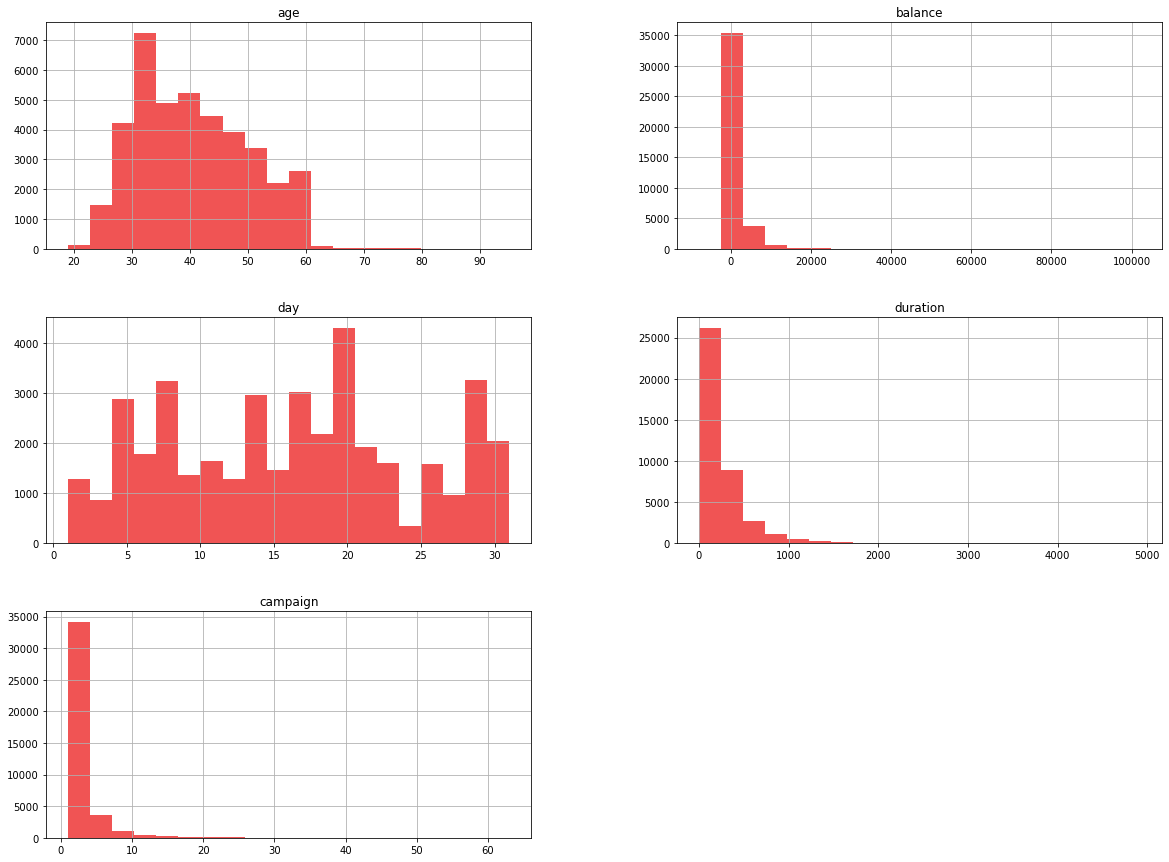

In [6]:
df.hist(bins=20, figsize=(20,15), color='#f05454');

## Categorical Columns Exploration
<a id="2.3"></a>

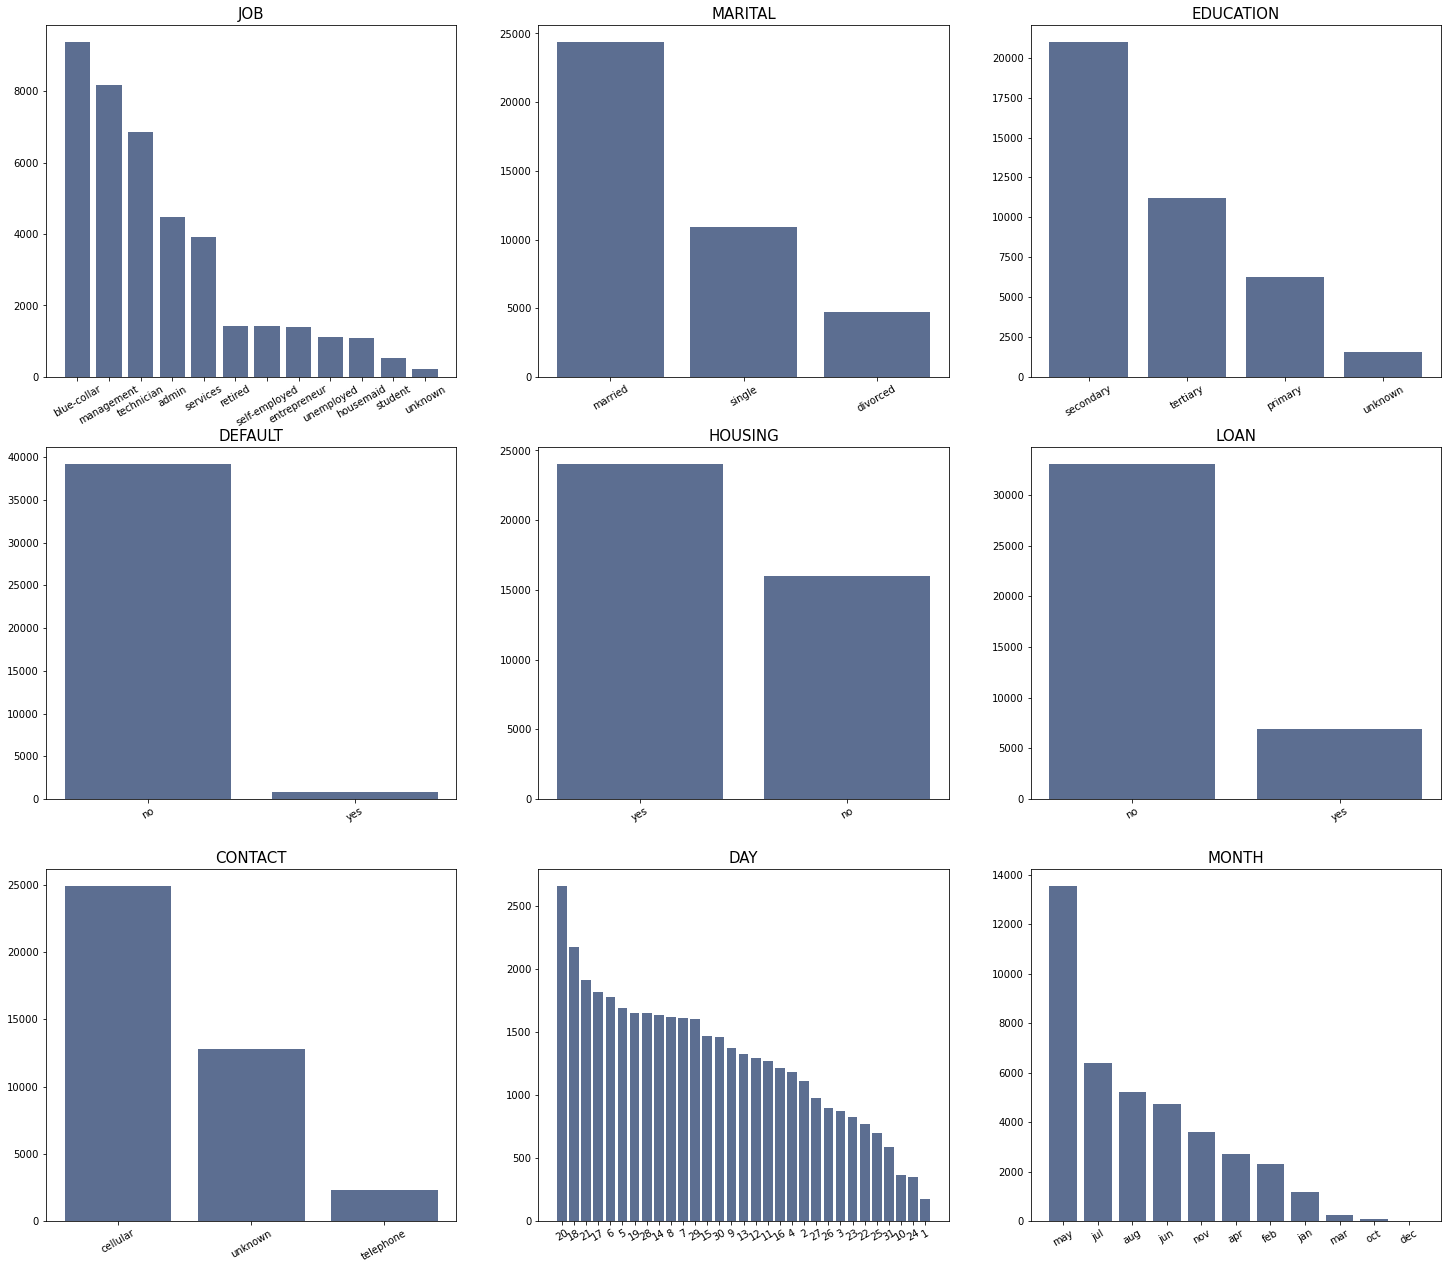

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(25, 22))

counter = 0
for cat_column in cat_cols:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index,color='#5c6e91')
    
    axs[trace_x, trace_y].set_title(cat_column.upper(),color='#000000',fontdict={'fontsize': 15})
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(30)
    
    counter += 1

plt.show()

## Target Column Exploration
<a id="2.4"></a>

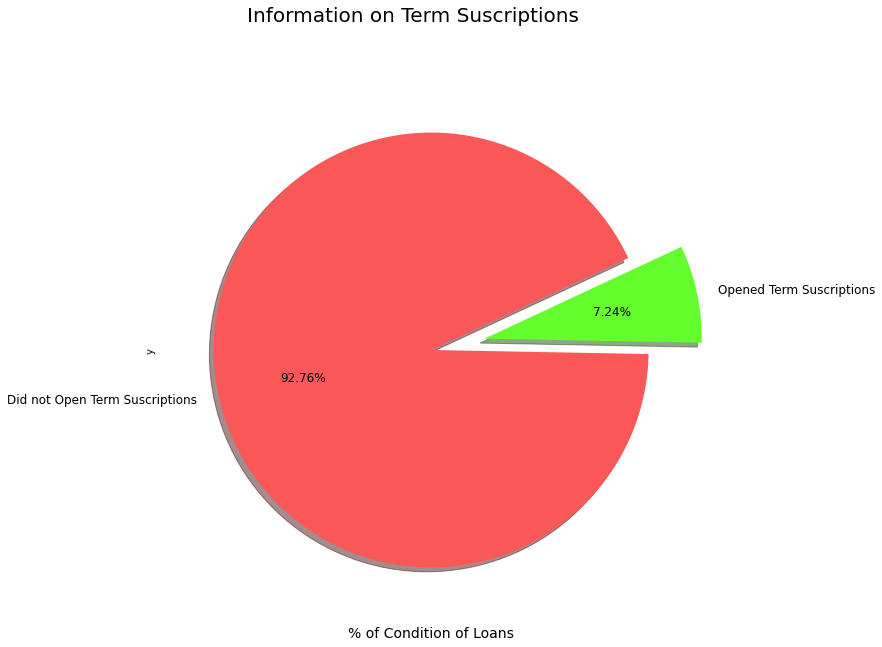

In [8]:
f, ax = plt.subplots(1,figsize=(20,10))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

ax.set_xlabel('% of Condition of Loans', fontsize=14);

## Analysis by Occupation:
<a id="2.5"></a>
<ul> 
    <li><b> Number of Occupations: </b>  Blue-Collar is the occupation that is more prevalent in this dataset.</li>
    <li><b>Age by Occupation: </b>  As expected, the retired are the ones who have the highest median age while student are the lowest.</li>
    </ul>

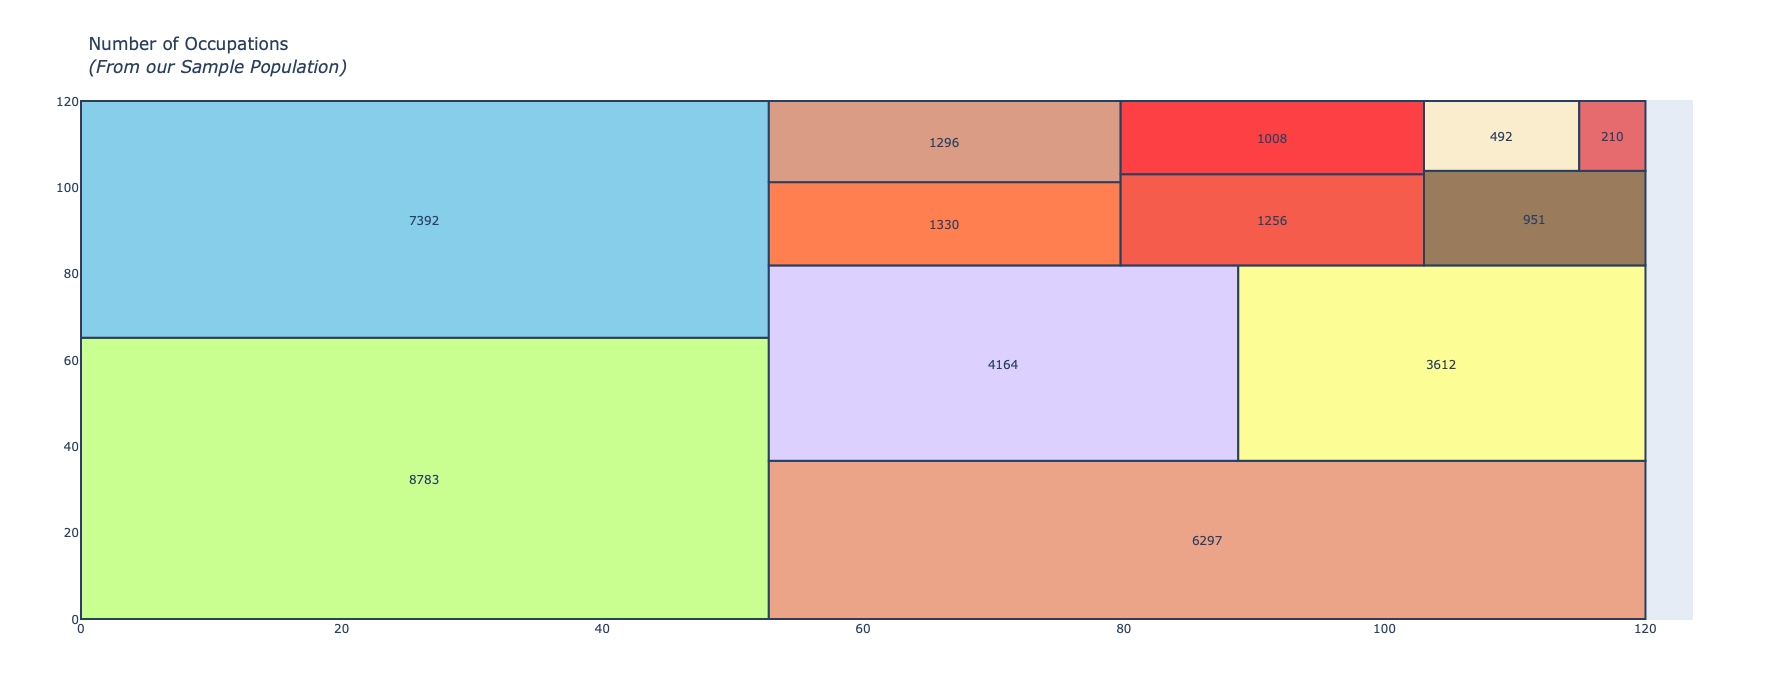

In [22]:
import squarify
df = df.drop(df.loc[df["balance"] == 0].index)


x = 0
y = 0
width = 120
height = 120

job_names = df['job'].value_counts().index
values = df['job'].value_counts().tolist()

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

colors = ['rgb(200, 255, 144)','rgb(135, 206, 235)',
          'rgb(235, 164, 135)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)', 
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)',
         '#faedcd', '#e56b6f']

shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = values[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0
    
# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    text = [ str(v) for v in job_names],
    mode='text',
)

layout = dict(
    title='Number of Occupations <br> <i>(From our Sample Population)</i>',
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

iplot(figure, filename='squarify-treemap')

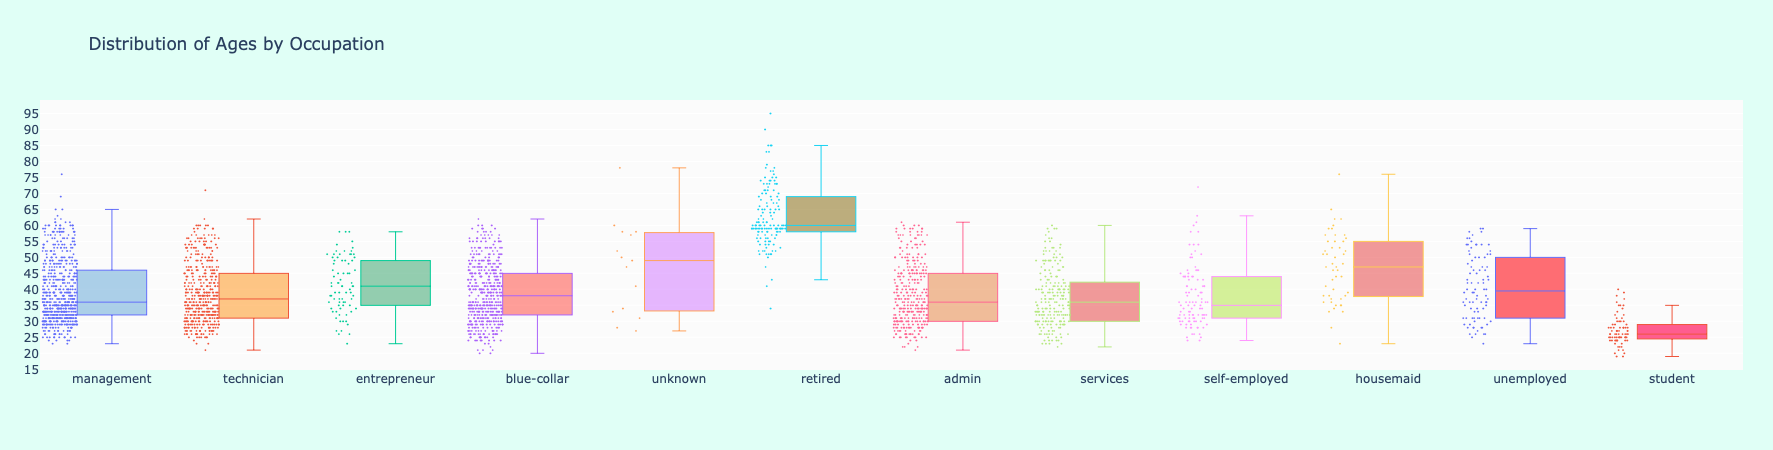

In [35]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = df.loc[df["y"] == "yes"]

occupations = df["job"].unique().tolist()

# Get the balances by jobs

management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unknown = suscribed_df["age"].loc[suscribed_df["job"] == "unknown"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
admin = suscribed_df["age"].loc[suscribed_df["job"] == "admin"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management,technician,entrepreneur,blue_collar,unknown,retired,admin,services,self_employed,housemaid,unemployed,student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         '#fe6d73','#ff5d8f']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

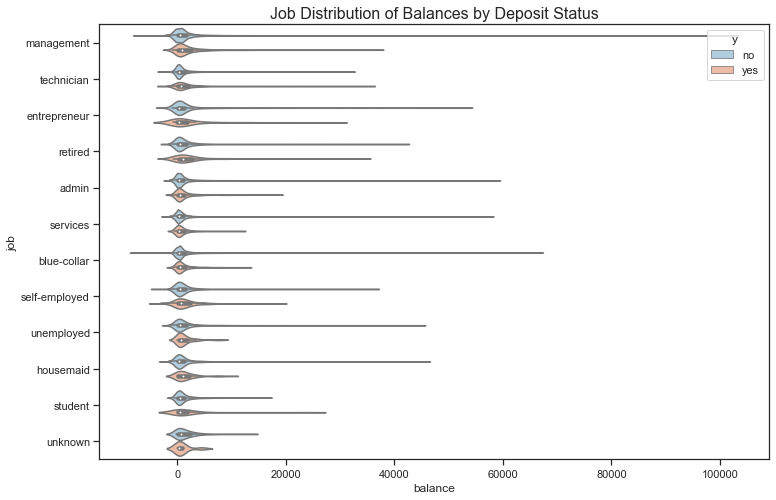

In [95]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="y", palette="RdBu_r",
            data=df);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

## Marital Status
<a id="2.6"></a>
Well in this analysis we didn't find any significant insights other than most <b> divorced individuals </b> are broke. No wonder since they have to split financial assets! Nevertheless, since no further insights have been found we will proceed to clustering marital status with education status. Let's see if we can find other groups of people in the sample population.

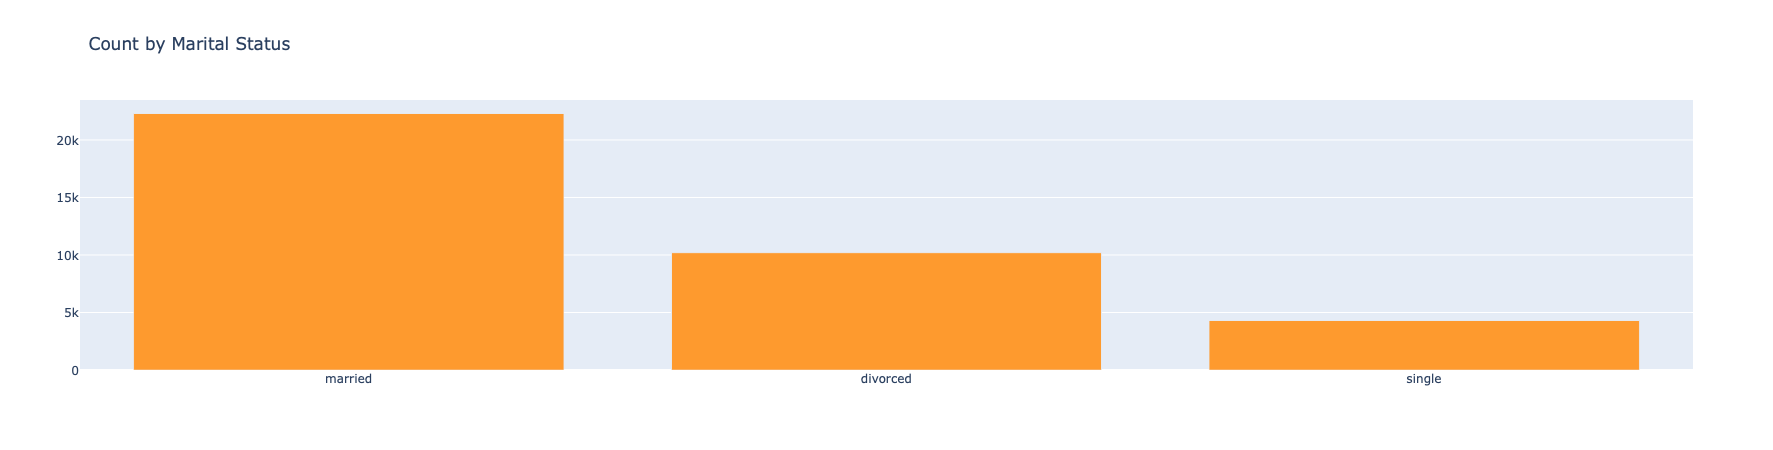

In [49]:
vals = df['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']

data = [go.Bar(
            x=labels,
            y=vals,
    marker=dict(
    color="#FE9A2E")
    )]

layout = go.Layout(
    title="Count by Marital Status",
)

fig = go.Figure(data=data, layout=layout)



iplot(fig, filename='basic-bar')

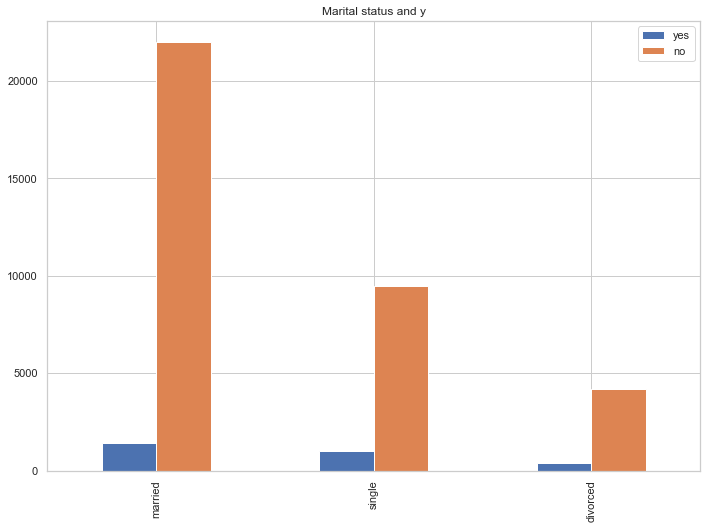

In [120]:
_df = pd.DataFrame()

_df['yes'] = df[df['y'] == 1]['marital'].value_counts()
_df['no'] = df[df['y'] == 0]['marital'].value_counts()

_df.plot.bar(title = 'Marital status and y');

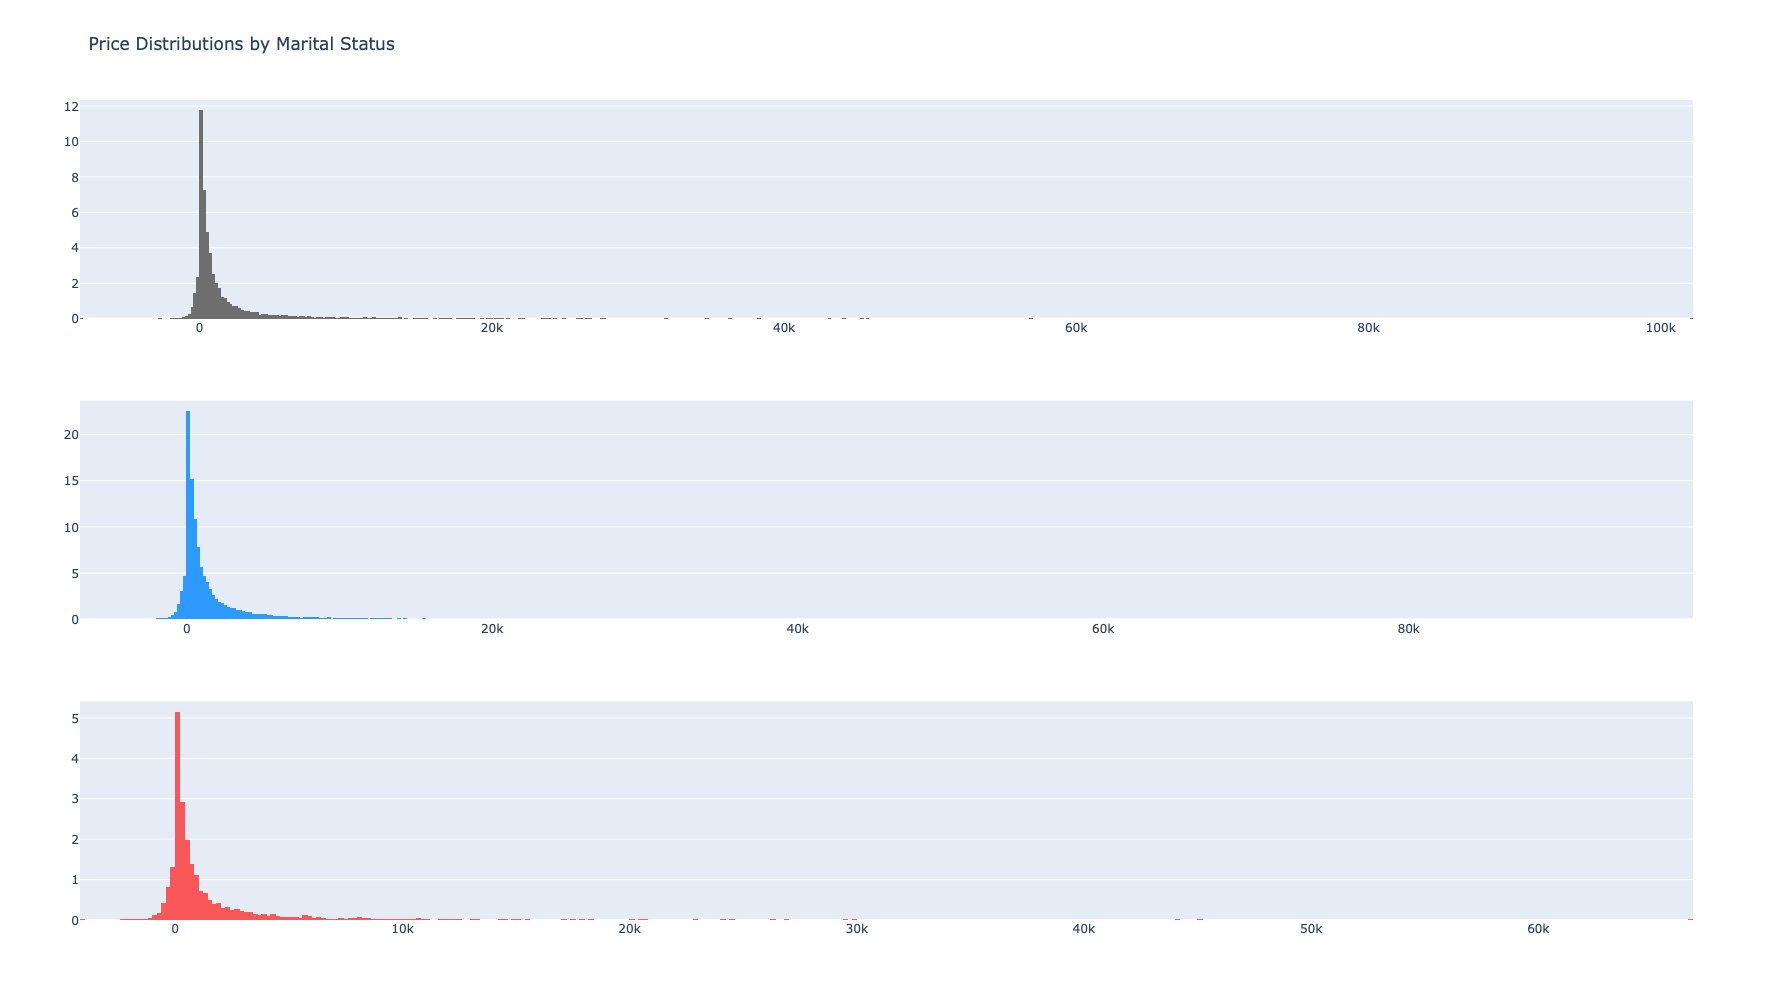

In [53]:
# Distribution of Balances by Marital status
single = df['balance'].loc[df['marital'] == 'single'].values
married = df['balance'].loc[df['marital'] == 'married'].values
divorced = df['balance'].loc[df['marital'] == 'divorced'].values


single_dist = go.Histogram(
    x=single,
    histnorm='density', 
    name='single',
    marker=dict(
        color='#6E6E6E'
    )
)


married_dist = go.Histogram(
    x=married,
    histnorm='density', 
    name='married',
    marker=dict(
        color='#2E9AFE'
    )
)

divorced_dist = go.Histogram(
    x=divorced,
    histnorm='density', 
    name='divorced',
    marker=dict(
        color='#FA5858'
    )
)


fig = tools.make_subplots(rows=3, print_grid=False)

fig.append_trace(single_dist, 1, 1)
fig.append_trace(married_dist, 2, 1)
fig.append_trace(divorced_dist, 3, 1)


fig['layout'].update(showlegend=False, title="Price Distributions by Marital Status",
                    height=1000, width=800)

iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

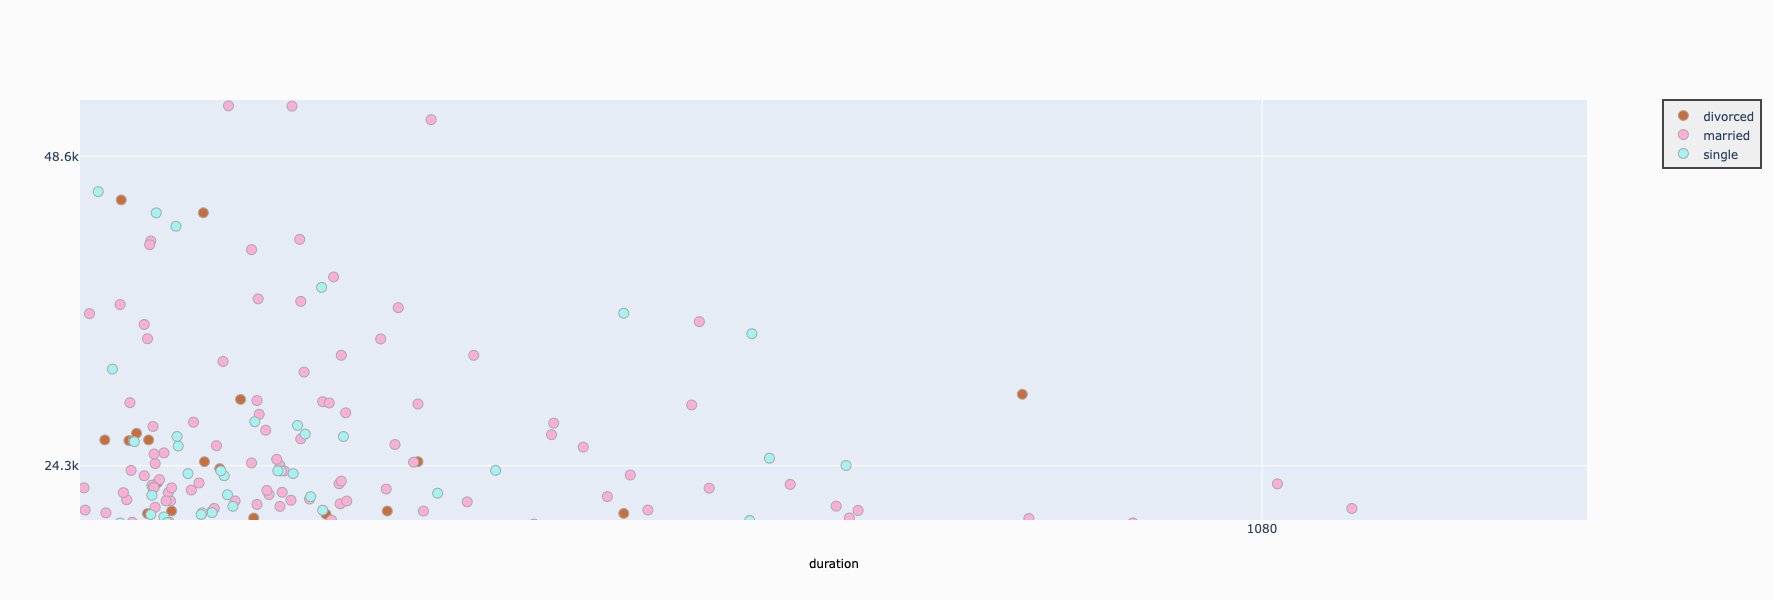

In [68]:
# Notice how divorced have a considerably low amount of balance.
fig = ff.create_facet_grid(
    df,
    x='duration',
    y='balance',
    color_name='marital',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'}
)

iplot(fig, filename='facet - custom colormap')

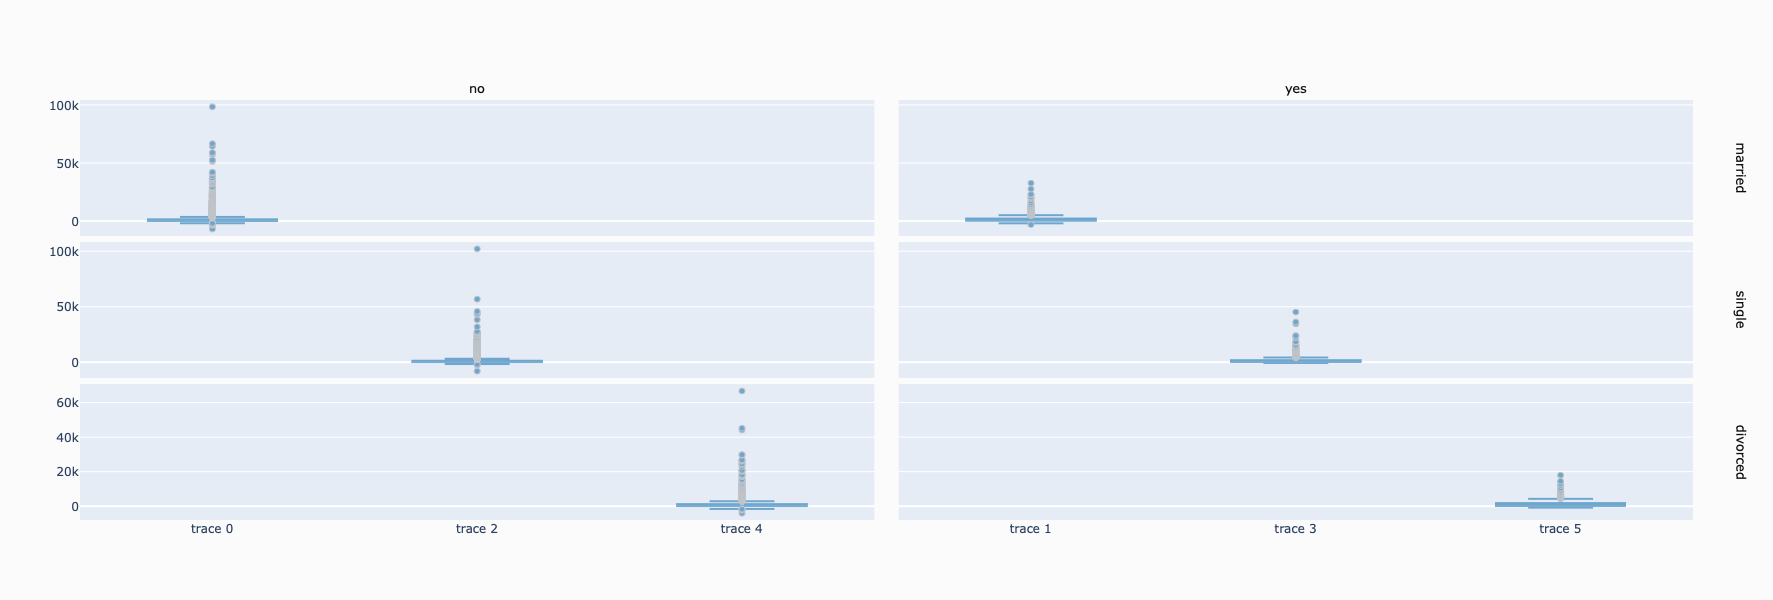

In [71]:
# Hmmm We have missed some important clients with some high balances. 
# This shouldn't be happening.
fig = ff.create_facet_grid(
    df,
    y='balance',
    facet_row='marital',
    facet_col='y',
    trace_type='box')

iplot(fig, filename='facet - box traces')

## Clustering Marital Status and Education
<a id="2.7"></a>
<ul> 
    <li><b>Marital Status: </b>  As discussed previously, the impact of a divorce has a significant impact on the balance of the individual. </li>
    <li><b>Education: </b> The level of education also has a significant impact on the amount of balance a prospect has.</li>
    <li><b> Loans: </b> Whether the prospect has a previous loan has a significant impact on the amount of balance he or she has. </li>
</ul>

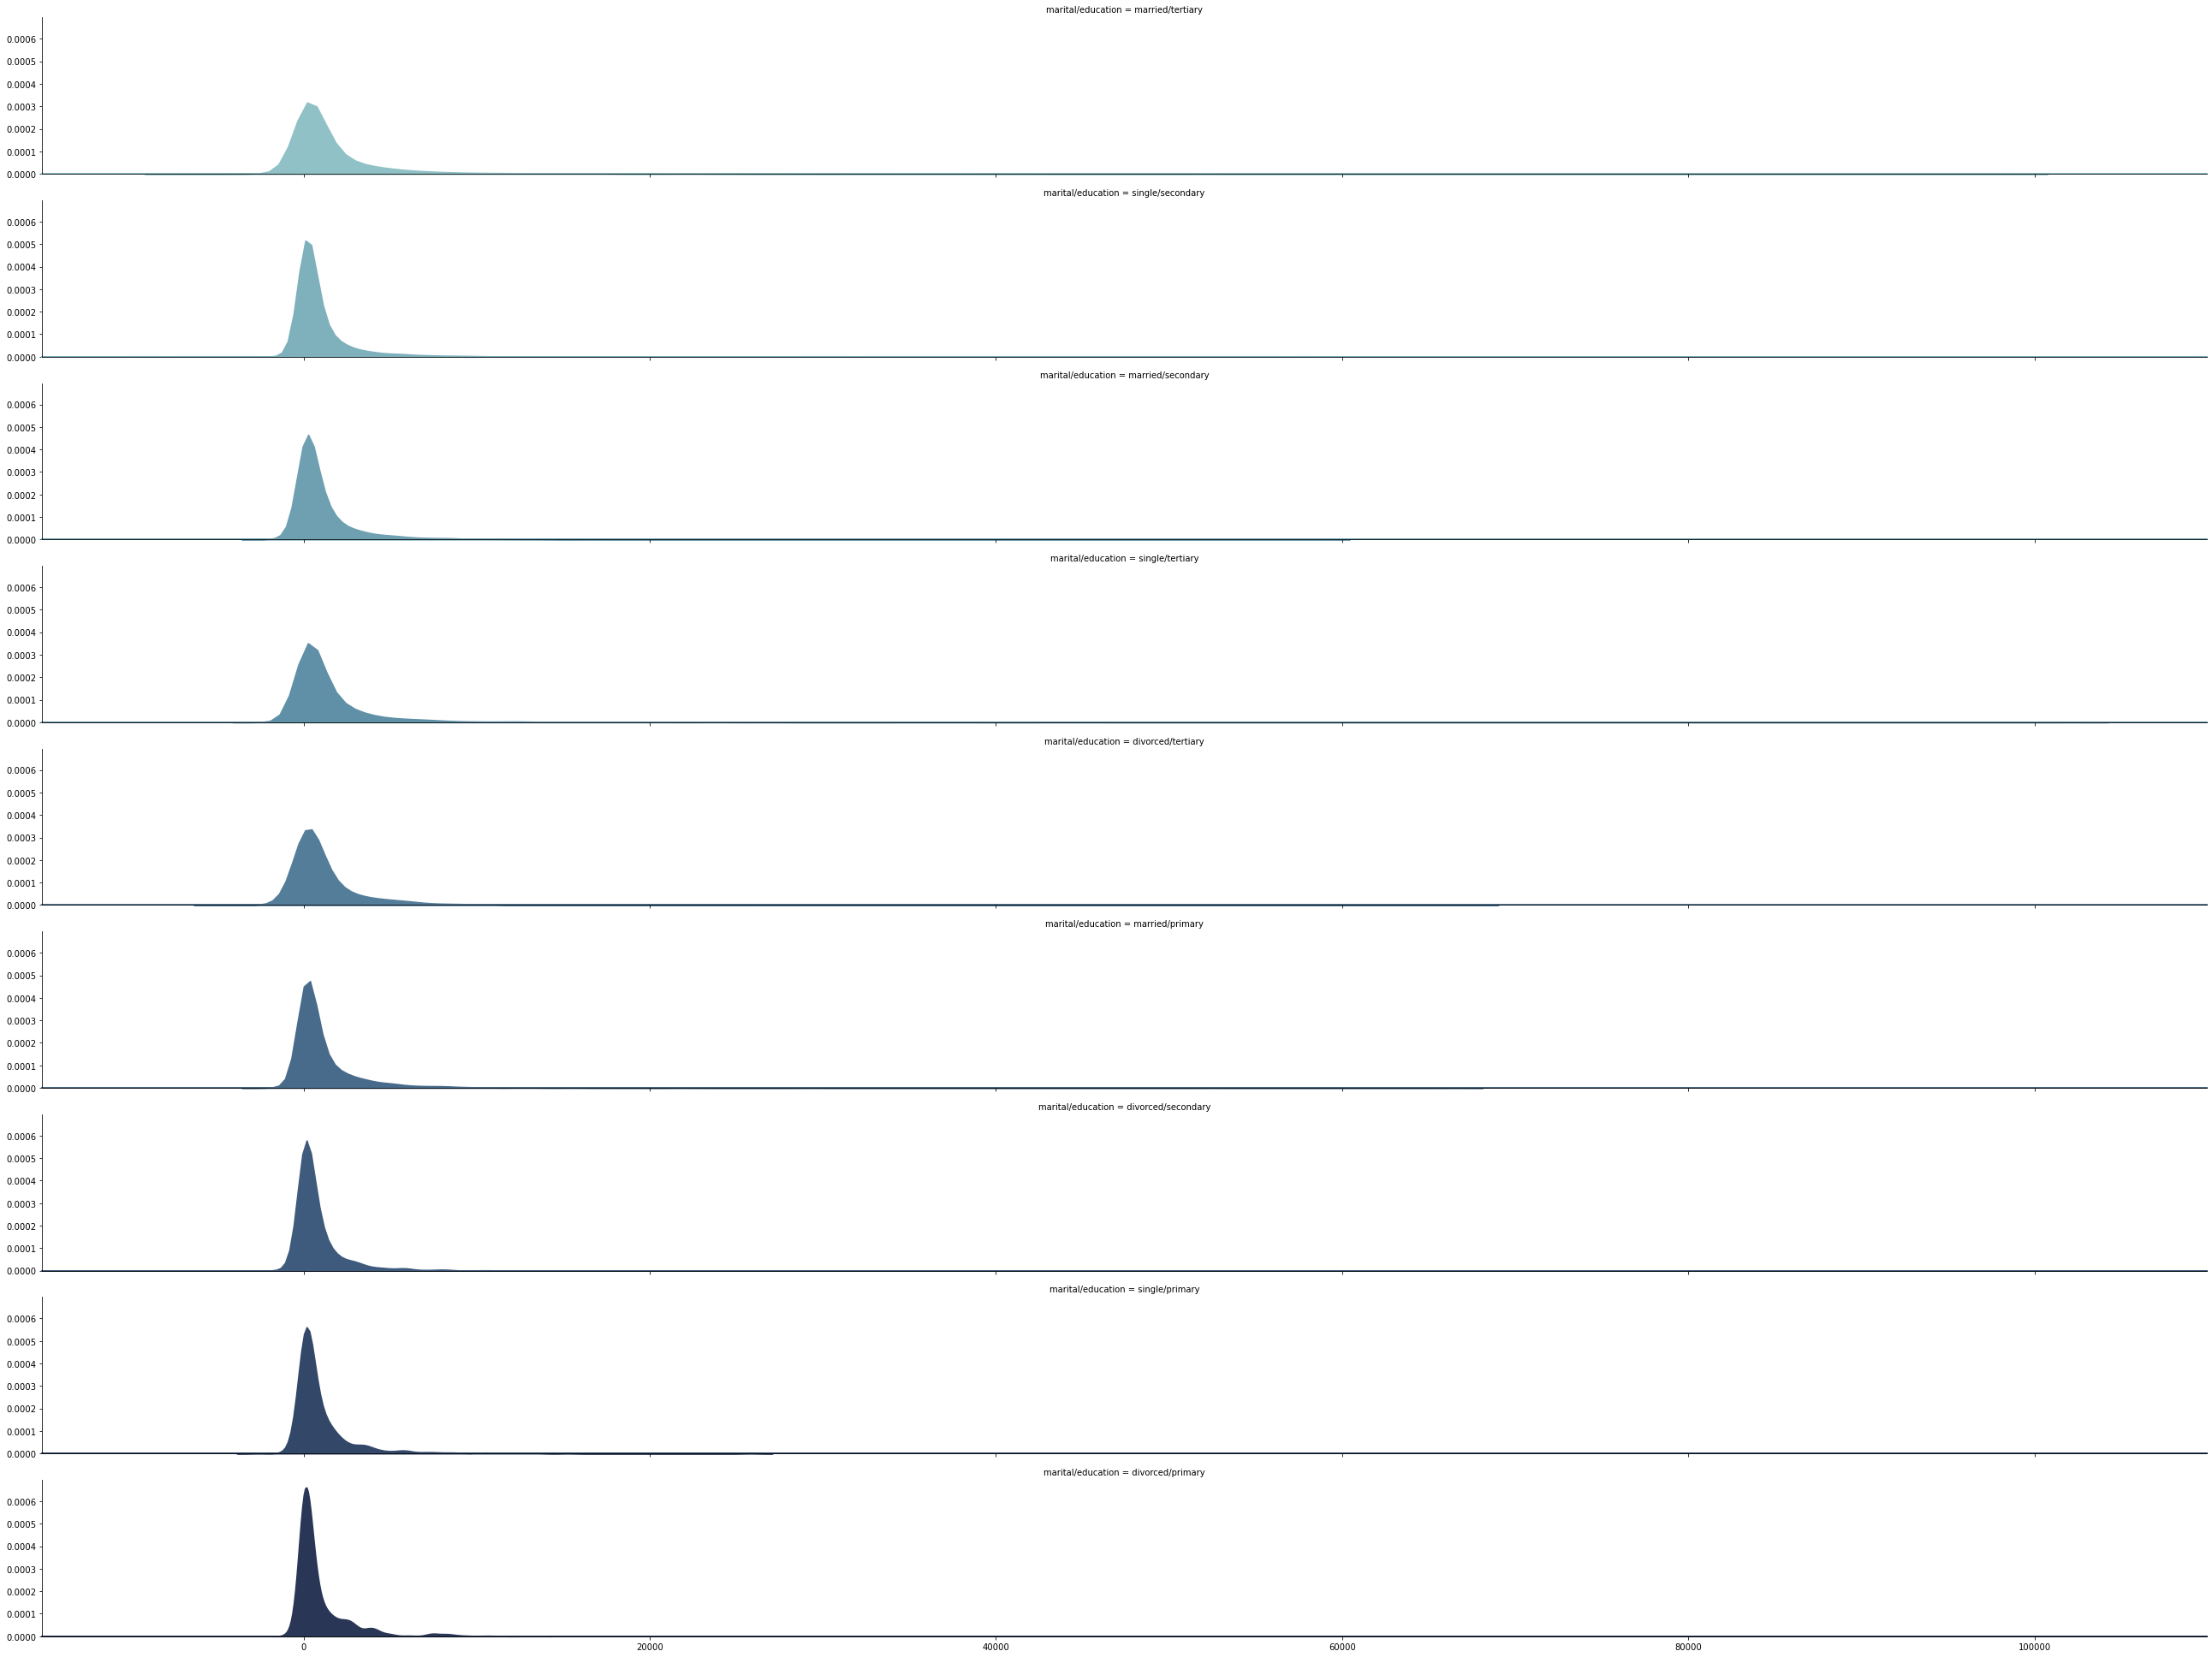

In [88]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="marital/education", hue="marital/education", aspect=12, palette=pal)

g.map(sns.kdeplot, "balance", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "balance", clip_on=False, color="w", lw=1, bw=0)
g.map(plt.axhline, y=0, lw=2, clip_on=False);

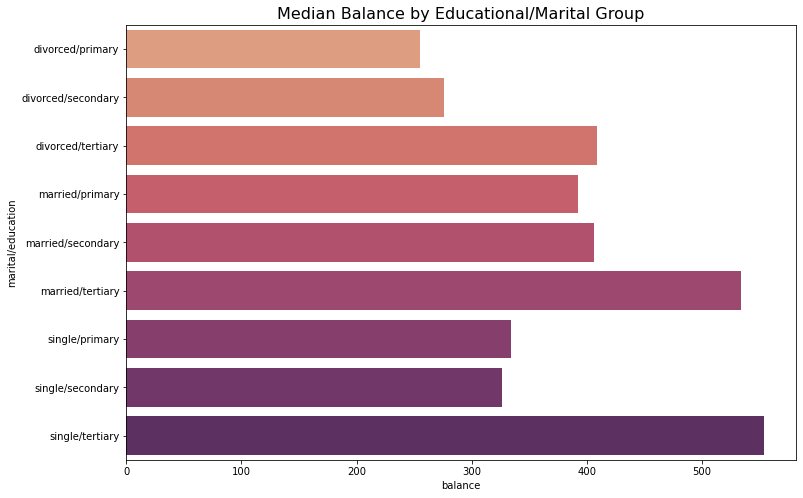

In [89]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(12,8))




sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="flare")

plt.title('Median Balance by Educational/Marital Group', fontsize=16);

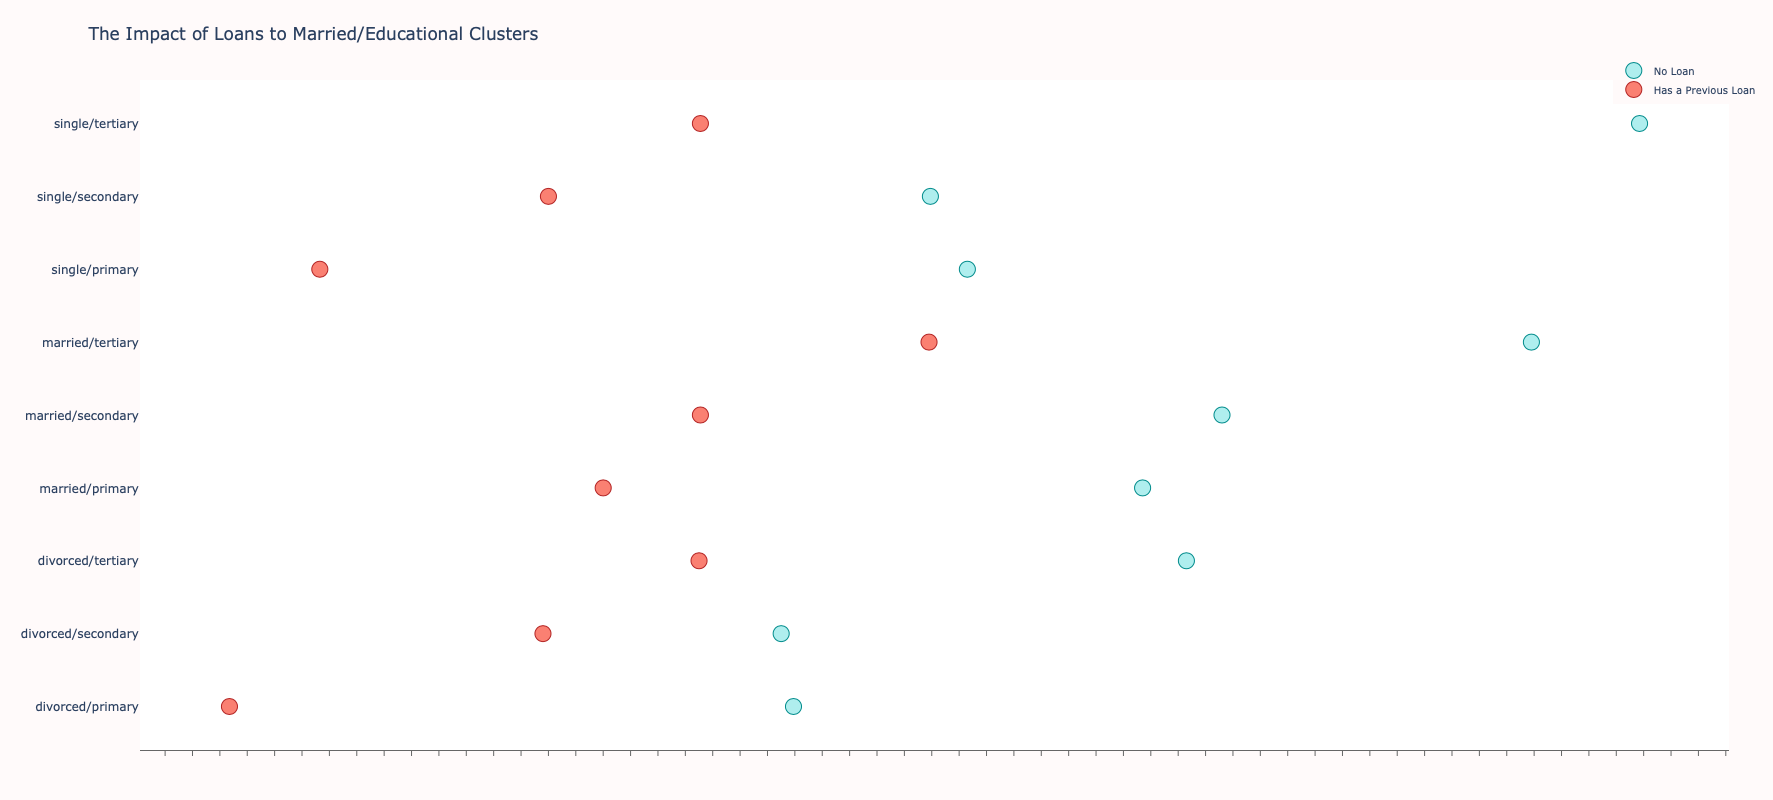

In [90]:
# Let's see the group who had loans from the marital/education group

loan_balance = df.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()


no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values


labels = loan_balance['marital/education'].unique().tolist()


trace0 = go.Scatter(
    x=no_loan,
    y=labels,
    mode='markers',
    name='No Loan',
    marker=dict(
        color='rgb(175,238,238)',
        line=dict(
            color='rgb(0,139,139)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=has_loan,
    y=labels,
    mode='markers',
    name='Has a Previous Loan',
    marker=dict(
        color='rgb(250,128,114)',
        line=dict(
            color='rgb(178,34,34)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title="The Impact of Loans to Married/Educational Clusters",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    width=1000,
    height=800,
    paper_bgcolor='rgb(255,250,250)',
    plot_bgcolor='rgb(255,255,255)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast');

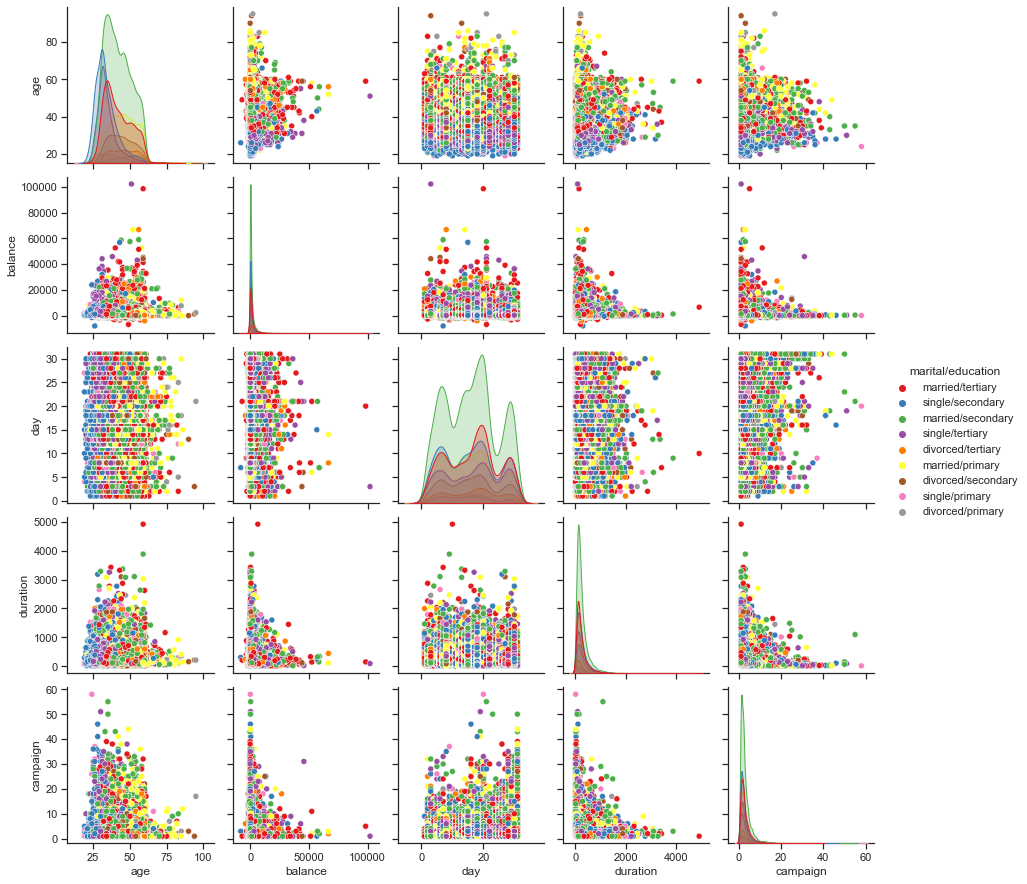

In [92]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df, hue="marital/education", palette="Set1")
plt.show()

## Campaign Duration
<a id="2.8"></a>
<ul>
    <li><b>Campaign Duration:</b> We see that duration has a high correlation with term deposits meaning the higher the duration, the more likely it is for a client to open a term deposit.  </li>
    <li> <b> Average Campaign Duration: </b> The average campaign duration is 254.98, let's see if clients that were above this average were more likely to open a term deposit. </b></li>
    <li><b>Duration Status: </b> People who were above the duration status, were more likely to open a term deposit. 18% of the group that is above average in duration opened term deposits while those that were below average 2% opened term deposit accounts. This tells us that it will be a good idea to target individuals who are in the above average category.</li>
    </ul>

In [97]:
df.drop(['marital/education', 'balance_status'], axis=1, inplace=True)

KeyError: "['balance_status'] not found in axis"

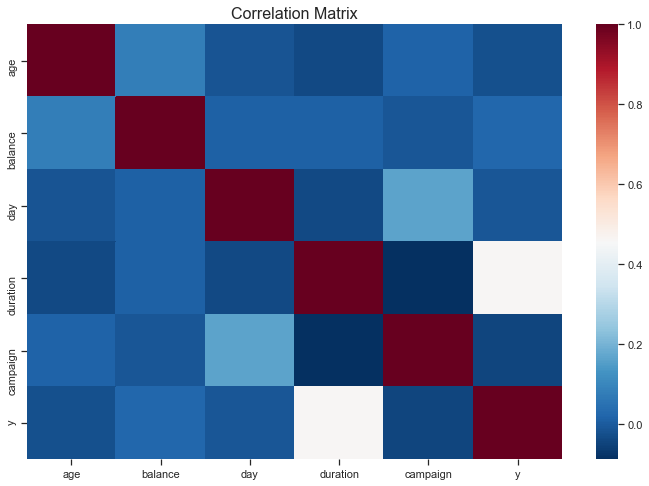

In [102]:
# Let's drop marital/education and balance status
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df['y'] = LabelEncoder().fit_transform(df['y'])



# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [121]:
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
5       35    management   married   tertiary      no      231     yes   no   
6       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39995   53    technician   married   tertiary      no      395      no   no   
39996   30    management    single   tertiary      no     3340      no   no   
39997   54         admin  divorced  secondary      no      200      no   no   
39998   34    management   married   tertiary      no     1047      no   no   
39999   38    technician   married  secondary      no     1442     yes   no   

        contact  day month  duration  campaign  y duration_status  
0       unknown    5   may       261         1  0   above_average  
1       unknown    5   may       151         1  0   below_average  
2       unknown    5   may        76         1  0   below_average  
5       unknown    5   may       139         1  0   below_average  
6       unknown    5   may       217         1  0   below_average  
...         ...  ...   ...       ...       ... ..             ...  
39995  cellular    3   jun       107         1  0   below_average  
39996  cellular    3   jun       238         3  1   below_average  
39997  cellular    3   jun       170         1  1   below_average  
39998  cellular    3   jun       342         1  0   above_average  
39999  cellular    3   jun       113         1  0   below_average  

[38469 rows x 15 columns]

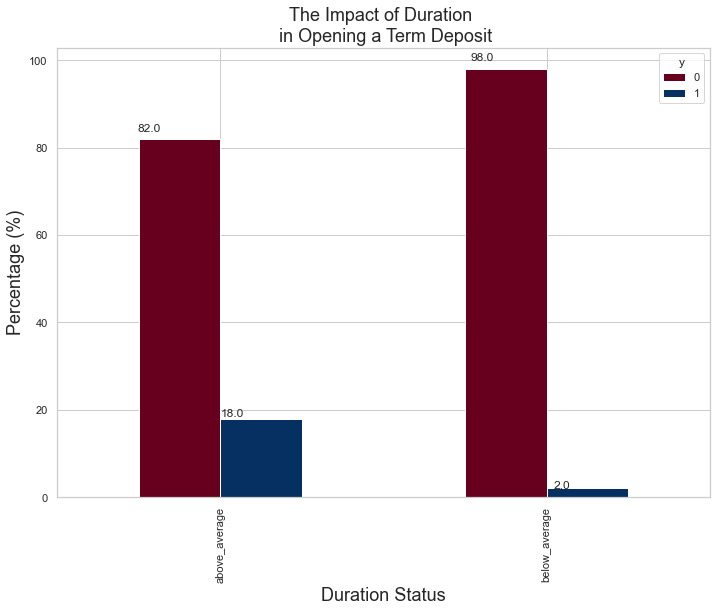

In [106]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['y']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    
plt.show()

In [126]:
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
5       35    management   married   tertiary      no      231     yes   no   
6       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39995   53    technician   married   tertiary      no      395      no   no   
39996   30    management    single   tertiary      no     3340      no   no   
39997   54         admin  divorced  secondary      no      200      no   no   
39998   34    management   married   tertiary      no     1047      no   no   
39999   38    technician   married  secondary      no     1442     yes   no   

        contact  day month  duration  campaign  y duration_status  
0       unknown    5   may       261         1  0   above_average  
1       unknown    5   may       151         1  0   below_average  
2       unknown    5   may        76         1  0   below_average  
5       unknown    5   may       139         1  0   below_average  
6       unknown    5   may       217         1  0   below_average  
...         ...  ...   ...       ...       ... ..             ...  
39995  cellular    3   jun       107         1  0   below_average  
39996  cellular    3   jun       238         3  1   below_average  
39997  cellular    3   jun       170         1  1   below_average  
39998  cellular    3   jun       342         1  0   above_average  
39999  cellular    3   jun       113         1  0   below_average  

[38469 rows x 15 columns]

# 3. Classification Model
<a id="3"></a>

In [168]:
dep = term_deposits['y']
term_deposits.drop(labels=['y'], axis=1,inplace=True)
term_deposits.insert(0, 'y', dep)
term_deposits.head()

#term_deposits["housing"].value_counts()/len(term_deposits)

y  age           job  marital  education default  balance housing loan  \
0  no   58    management  married   tertiary      no     2143     yes   no   
1  no   44    technician   single  secondary      no       29     yes   no   
2  no   33  entrepreneur  married  secondary      no        2     yes  yes   
3  no   47   blue-collar  married    unknown      no     1506     yes   no   
4  no   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  
0  unknown    5   may       261         1  
1  unknown    5   may       151         1  
2  unknown    5   may        76         1  
3  unknown    5   may        92         1  
4  unknown    5   may       198         1

In [169]:
term_deposits["loan"].value_counts()/len(term_deposits)

no     0.82675
yes    0.17325
Name: loan, dtype: float64

## Stratified Sampling
<a id="3.1"></a>
Stratified Sampling: Is an important concept that is often missed when developing a model either for regression or classification. Remember, that in order to avoid overfitting of our data we must implement a cross validation however, we must make sure that at least the features that have the greatest influence on our label (whether a potential client will open a term deposit or not) is equally distributed. What do I mean by this? <br><br>


Personal Loans:<br>
For instance, having a personal loan is an important feature that determines whether a potential client will open a term deposit or not.<br>
1) We need to see how our data is distributed. <br>
2) After noticiing that the column of loan contains 82,7% of "no" (Does not have personal loans) and 17,3,% of "yes" (Have personal loans.) <br> 
3) We want to make sure that our training and test set contains the same ratio of 82,7% "no" and 17,3% "yes".  <br><br>

In [174]:
from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(term_deposits, term_deposits["loan"]):
    stratified_train = term_deposits.loc[train_set]
    stratified_test = term_deposits.loc[test_set]
    
print('***TRAIN***')    
print(stratified_train["loan"].value_counts()/len(df))
print('***TEST***')  
print(stratified_test["loan"].value_counts()/len(df))

***TRAIN***
no     0.687723
yes    0.144116
Name: loan, dtype: float64
***TEST***
no     0.171931
yes    0.036029
Name: loan, dtype: float64


In [177]:
# Separate the labels and the features.
train_data = stratified_train # Make a copy of the stratified training set.
test_data = stratified_test

print('***TRAIN***') 
print(train_data.shape)
print('***TEST***') 
print(test_data.shape)
print('***TRAIN TARGET VALUES***') 
print(train_data['y'].value_counts())

***TRAIN***
(32000, 14)
***TEST***
(8000, 14)
***TRAIN TARGET VALUES***
no     29702
yes     2298
Name: y, dtype: int64


In [134]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, no need to try to
# understand every line.
# Code reference Hands on Machine Learning with Scikit Learn and Tensorflow by Aurelien Geron.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [135]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [136]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 16688 to 1852
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   y          32000 non-null  object
 1   age        32000 non-null  int64 
 2   job        32000 non-null  object
 3   marital    32000 non-null  object
 4   education  32000 non-null  object
 5   default    32000 non-null  object
 6   balance    32000 non-null  int64 
 7   housing    32000 non-null  object
 8   loan       32000 non-null  object
 9   contact    32000 non-null  object
 10  day        32000 non-null  int64 
 11  month      32000 non-null  object
 12  duration   32000 non-null  int64 
 13  campaign   32000 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 3.7+ MB


In [153]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Making pipelines
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["age", "balance", "day", "duration", "campaign"])),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["job", "marital", "education", "default", "housing", "loan", "contact", "month"])),
    ("cat_encoder", CategoricalEncoder(encoding='onehot-dense'))
])

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])

In [154]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[-0.57685041,  0.00238043,  0.96658923, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.70306273, -0.40027572, -1.69255949, ...,  0.        ,
         0.        ,  0.        ],
       [-0.36958558, -0.39164984, -1.20907791, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.1485765 , -0.28917437, -1.08820751, ...,  1.        ,
         0.        ,  0.        ],
       [-0.88774766, -0.44271506, -0.96733711, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.25220891, -0.32678321, -0.84646672, ...,  1.        ,
         0.        ,  0.        ]])

In [156]:
y_train = train_data['y']
y_test = test_data['y']
y_train.shape

(32000,)

In [157]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)
y_train_yes = (y_train == 1)
y_train
y_train_yes

array([False, False, False, ..., False, False, False])

In [158]:
some_instance = X_train[1250]

In [160]:
# Time for Classification Models
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [161]:
#  Thanks to Ahspinar for the function. 
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [162]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 0.82 s
trained Nearest Neighbors in 0.43 s
trained Linear SVM in 14.26 s
trained Gradient Boosting Classifier in 5.31 s
trained Decision Tree in 0.21 s
trained Random Forest in 0.45 s
trained Neural Net in 15.40 s
trained Naive Bayes in 0.10 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       0.211899
5                 Random Forest     0.997719       0.452428
1             Nearest Neighbors     0.947406       0.430605
3  Gradient Boosting Classifier     0.943656       5.305668
2                    Linear SVM     0.942781      14.263674
0           Logistic Regression     0.936000       0.816262
6                    Neural Net     0.935219      15.395311
7                   Naive Bayes     0.905719       0.103965


## Avoiding Overfitting
<a id="3.2"></a>
Brief Description of Overfitting?<br>
This is an error in the modeling algorithm that takes into consideration random noise in the fitting process rather than the pattern itself. You can see that this occurs when the model gets an awsome score in the training set but when we use the test set (Unknown data for the model) we get an awful score. This is likely to happen because of overfitting of the data (taking into consideration random noise in our pattern). What we want our model to do is to take the overall pattern of the data in order to correctly classify whether a potential client will suscribe to a term deposit or not. In the examples above, it is most likely that the Decision Tree Classifier and Random Forest classifiers are overfitting since they both give us nearly perfect scores (100% and 99%) accuracy scores. <br><br>


How can we avoid Overfitting?<br>
The best alternative to avoid overfitting is to use cross validation. Taking the training test and splitting it. For instance, if we split it by 3, 2/3 of the data or 66% will be used for training and 1/3 33% will be used or testing and we will do the testing process five times. This algorithm will iterate through all the training and test sets and the main purpose of this is to grab the overall pattern of the data.

In [178]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=5)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=5)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=5)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=5)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=5)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=5)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=5)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [179]:
# All our models perform well but I will go with GradientBoosting.
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

Classifiers  Crossval Mean Scores
4         Grad B CLF              0.939250
1                SVC              0.935844
0      Logistic Reg.              0.935469
6  Neural Classifier              0.934937
7       Naives Bayes              0.934937
5            Rand FC              0.934281
2                KNN              0.932281
3           Dec Tree              0.915156

## Confusion Matrix 
<a id="3.3"></a>
<img src="https://computersciencesource.files.wordpress.com/2010/01/conmat.png">

### Insights of a Confusion Matrix: 
The main purpose of a confusion matrix is to see how our model is performing when it comes to classifying potential clients that are likely to suscribe to a term deposit. We will see in the confusion matrix four terms the True Positives, False Positives, True Negatives and False Negatives.<br><br>

**Positive/Negative:** Type of Class (label) ["No", "Yes"]
**True/False:** Correctly or Incorrectly classified by the model.<br><br>

**True Negatives (Top-Left Square):** This is the number of **correctly** classifications of the "No" class or potenial clients that are **not willing** to suscribe a term deposit. <br><br>

**False Negatives (Top-Right Square):** This is the number of **incorrectly** classifications of the "No" class or potential clients that are **not willing** to suscribe a term depositt. <br><br>

**False Positives (Bottom-Left Square):** This is the number of **incorrectly** classifications of the "Yes" class or potential clients that are **willing** to suscribe a term deposit. <br><br>

**True Positives (Bottom-Right Square):** This is the number of **correctly** classifications of the "Yes" class or potenial clients that are **willing** to suscribe a term deposit.

In [180]:
# Cross validate our Gradient Boosting Classifier
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=3)

In [181]:
from sklearn.metrics import accuracy_score
grad_clf.fit(X_train, y_train)
print ("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

Gradient Boost Classifier accuracy is 0.94


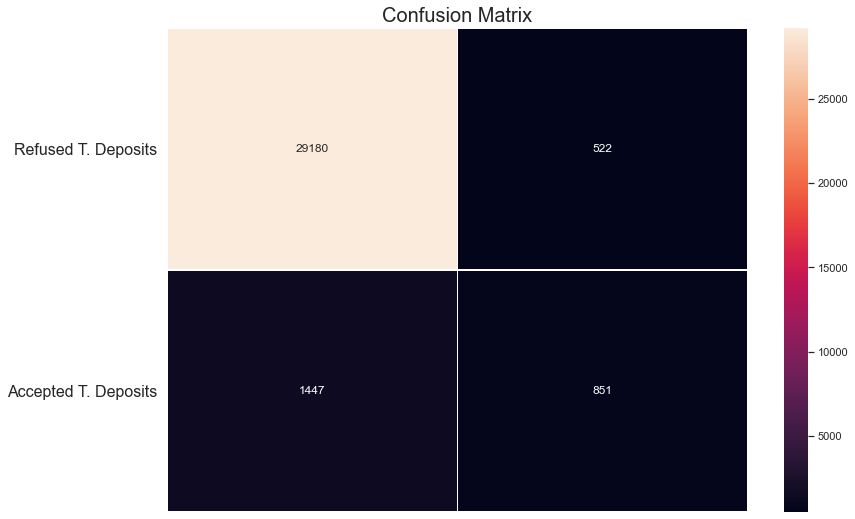

In [182]:
from sklearn.metrics import confusion_matrix
# 29702: no's, 2298: yes
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

## Precision and Recall
<a id="3.4"></a>
**Recall:** Is the total number of "Yes" in the label column of the dataset. So how many "Yes" labels does our model detect. <br><br>
**Precision:** Means how sure is the prediction of our model that the actual label is a "Yes".

### Recall Precision Tradeoff
As the precision gets higher the recall gets lower and vice versa. For instance, if we increase the precision from 30% to 60% the model is picking the predictions that the model believes is 60% sure. If there is an instance where the model believes that is 58% likely to be a potential client that will suscribe to a term deposit then the model will classify it as a **"No."** However, that instance was actually a **"Yes"** (potential client did suscribe to a term deposit.) That is why the higher the precision the more likely the model is to miss instances that are actually a **"Yes"!**

In [183]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 77% sure that the potential client will suscribe to a term deposit. 
# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('Precision Score: ', precision_score(y_train, y_train_pred))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_train, y_train_pred))

Precision Score:  0.619810633648944
Recall Score:  0.3703220191470844


In [184]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.4636338872241896

In [185]:
y_scores = grad_clf.decision_function([some_instance])
y_scores

array([-3.58829074])

In [186]:
# Increasing the threshold decreases the recall.
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [187]:
y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=3, method="decision_function")
neural_y_scores = cross_val_predict(neural_clf, X_train, y_train, cv=3, method="predict_proba")
naives_y_scores = cross_val_predict(nav_clf, X_train, y_train, cv=3, method="predict_proba")

In [188]:
# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

if neural_y_scores.ndim == 2:
    neural_y_scores = neural_y_scores[:, 1]
    
if naives_y_scores.ndim == 2:
    naives_y_scores = naives_y_scores[:, 1]

In [189]:
y_scores.shape

(32000,)

In [190]:
# How can we decide which threshold to use? We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

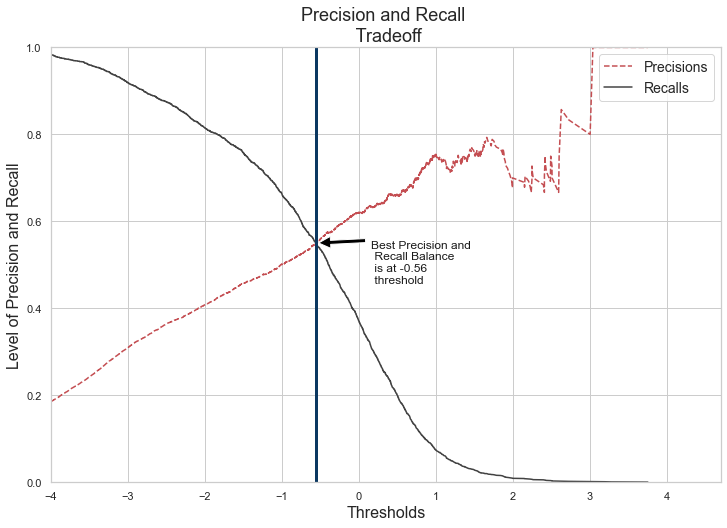

In [219]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-4, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=-0.56, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at -0.56 \n threshold ', xy=(-0.56, 0.55), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()

## ROC Curve (Receiver Operating Characteristic)
<a id="3.5"></a>
The **ROC curve** tells us how well our classifier is classifying between term deposit suscriptions (True Positives) and non-term deposit suscriptions. The **X-axis** is represented by False positive rates (Specificity) and the **Y-axis** is represented by the True Positive Rate (Sensitivity.) As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes.


In [220]:
from sklearn.metrics import roc_curve
# Gradient Boosting Classifier
# Neural Classifier
# Naives Bayes Classifier
grd_fpr, grd_tpr, thresold = roc_curve(y_train, y_scores)
neu_fpr, neu_tpr, neu_threshold = roc_curve(y_train, neural_y_scores)
nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

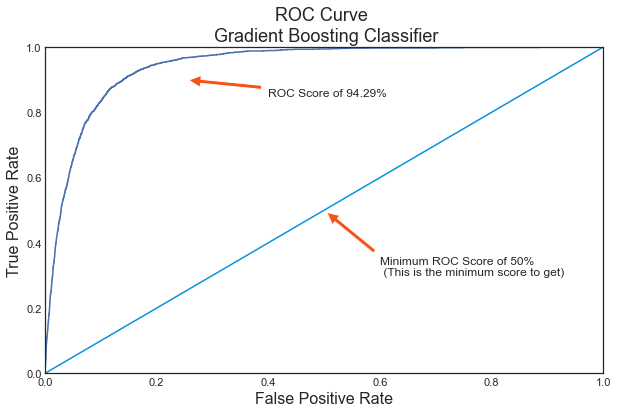

In [242]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Gradient Boosting Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 94.29%', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    
graph_roc_curve(grd_fpr, grd_tpr, threshold)
plt.show()

In [227]:
from sklearn.metrics import roc_auc_score

print('Gradient Boost Classifier Score: ', roc_auc_score(y_train, y_scores))
print('Neural Classifier Score: ', roc_auc_score(y_train, neural_y_scores))
print('Naives Bayes Classifier: ', roc_auc_score(y_train, naives_y_scores))

Gradient Boost Classifier Score:  0.9429753230801652
Neural Classifier Score:  0.9259422388883036
Naives Bayes Classifier:  0.7710149934958799


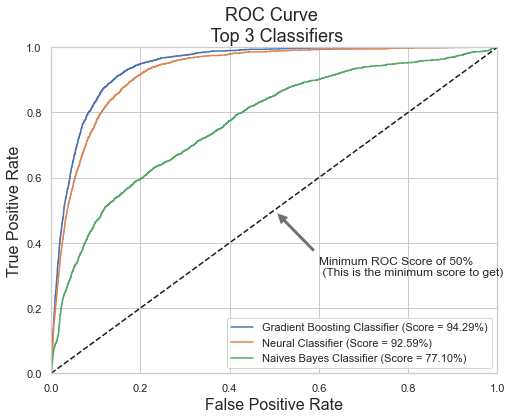

In [229]:
def graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(grd_fpr, grd_tpr, label='Gradient Boosting Classifier (Score = 94.29%)')
    plt.plot(neu_fpr, neu_tpr, label='Neural Classifier (Score = 92.59%)')
    plt.plot(nav_fpr, nav_tpr, label='Naives Bayes Classifier (Score = 77.10%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr)
plt.show()

In [230]:
grad_clf.predict_proba([some_instance])

array([[0.97309817, 0.02690183]])

In [231]:
# Let's see what does our classifier predict.
grad_clf.predict([some_instance]) 

array([0])

In [232]:
y_train[1250]

0

## Which Features Influence the Result of a Term Deposit Suscription?
<a id="3.6"></a>
### DecisionTreeClassifier
The top three most important features for our classifier are **duration** (how long it took the conversation between the sales representative and the potential client), **month** (the month of the year), **day** (day of month) and **contact** .




In [233]:
term_deposits

y  age           job   marital  education default  balance housing  \
0       no   58    management   married   tertiary      no     2143     yes   
1       no   44    technician    single  secondary      no       29     yes   
2       no   33  entrepreneur   married  secondary      no        2     yes   
3       no   47   blue-collar   married    unknown      no     1506     yes   
4       no   33       unknown    single    unknown      no        1      no   
...    ...  ...           ...       ...        ...     ...      ...     ...   
39995   no   53    technician   married   tertiary      no      395      no   
39996  yes   30    management    single   tertiary      no     3340      no   
39997  yes   54         admin  divorced  secondary      no      200      no   
39998   no   34    management   married   tertiary      no     1047      no   
39999   no   38    technician   married  secondary      no     1442     yes   

      loan   contact  day month  duration  campaign  
0       no   unknown    5   may       261         1  
1       no   unknown    5   may       151         1  
2      yes   unknown    5   may        76         1  
3       no   unknown    5   may        92         1  
4       no   unknown    5   may       198         1  
...    ...       ...  ...   ...       ...       ...  
39995   no  cellular    3   jun       107         1  
39996   no  cellular    3   jun       238         3  
39997   no  cellular    3   jun       170         1  
39998   no  cellular    3   jun       342         1  
39999   no  cellular    3   jun       113         1  

[40000 rows x 14 columns]

Feature ranking:
1. feature 11 (0.694612)
2. feature 10 (0.141658)
3. feature 9 (0.061748)
4. feature 8 (0.045435)
5. feature 6 (0.042457)
6. feature 12 (0.007529)
7. feature 5 (0.004019)
8. feature 3 (0.001065)
9. feature 0 (0.000870)
10. feature 2 (0.000514)
11. feature 1 (0.000094)
12. feature 7 (0.000000)
13. feature 4 (0.000000)


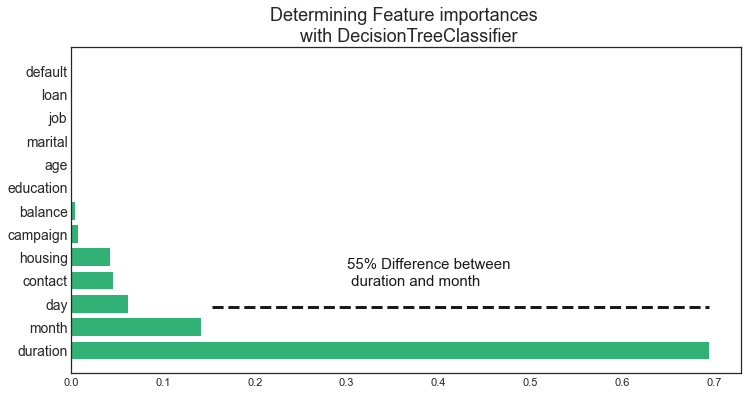

In [238]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
plt.style.use('seaborn-white')

# Convert the columns into categorical variables
term_deposits['job'] = term_deposits['job'].astype('category').cat.codes
term_deposits['marital'] = term_deposits['marital'].astype('category').cat.codes
term_deposits['education'] = term_deposits['education'].astype('category').cat.codes
term_deposits['default'] = term_deposits['default'].astype('category').cat.codes
term_deposits['housing'] = term_deposits['housing'].astype('category').cat.codes
term_deposits['loan'] = term_deposits['loan'].astype('category').cat.codes
term_deposits['contact'] = term_deposits['contact'].astype('category').cat.codes
term_deposits['month'] = term_deposits['month'].astype('category').cat.codes




# Let's create new splittings like before but now we modified the data so we need to do it one more time.
# Create train and test splits
target_name = 'y'
X = term_deposits.drop('y', axis=1)


label=term_deposits[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2, random_state=42, stratify=label)

# Build a classification task using 3 informative features
tree = tree.DecisionTreeClassifier(
    class_weight='balanced',
    min_weight_fraction_leaf = 0.01
    
)



tree = tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_names = term_deposits.drop('y', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=3, linestyle='--')
    plt.text(0.30, 2.8, '55% Difference between \n duration and month', color='k', fontsize=15)
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

## GradientBoosting Classifier Wins!
<a id="3.7"></a>
Gradient Boosting classifier is the best model to predict whether or not a **potential client** will suscribe to a term deposit or not.  93,93% accuracy!

Feature ranking:
1. feature 11 (0.757457)
2. feature 10 (0.100381)
3. feature 9 (0.036905)
4. feature 8 (0.034298)
5. feature 6 (0.033525)
6. feature 0 (0.013609)
7. feature 2 (0.006997)
8. feature 5 (0.006902)
9. feature 12 (0.005047)
10. feature 3 (0.002742)
11. feature 7 (0.001097)
12. feature 1 (0.001040)
13. feature 4 (0.000000)


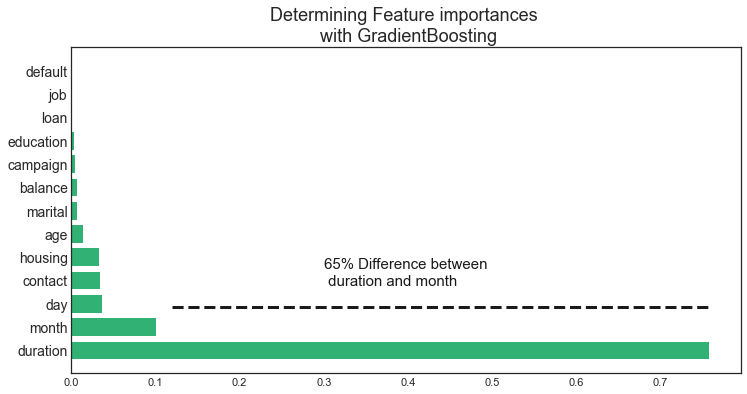

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
plt.style.use('seaborn-white')

# Convert the columns into categorical variables
term_deposits['job'] = term_deposits['job'].astype('category').cat.codes
term_deposits['marital'] = term_deposits['marital'].astype('category').cat.codes
term_deposits['education'] = term_deposits['education'].astype('category').cat.codes
term_deposits['default'] = term_deposits['default'].astype('category').cat.codes
term_deposits['housing'] = term_deposits['housing'].astype('category').cat.codes
term_deposits['loan'] = term_deposits['loan'].astype('category').cat.codes
term_deposits['contact'] = term_deposits['contact'].astype('category').cat.codes
term_deposits['month'] = term_deposits['month'].astype('category').cat.codes




# Let's create new splittings like before but now we modified the data so we need to do it one more time.
# Create train and test splits
target_name = 'y'
X = term_deposits.drop('y', axis=1)


label=term_deposits[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2, random_state=42, stratify=label)

# Build a classification task using 3 informative features
tree = GradientBoostingClassifier(min_weight_fraction_leaf = 0.01)



tree = tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_names = term_deposits.drop('y', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with GradientBoosting", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    plt.axhline(y=1.85, xmin=0.15, xmax=0.952, color='k', linewidth=3, linestyle='--')
    plt.text(0.30, 2.8, '65% Difference between \n duration and month', color='k', fontsize=15)
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

In [239]:
# Our three classifiers are grad_clf, nav_clf and neural_clf
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('gbc', grad_clf), ('nav', nav_clf), ('neural', neural_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                             ('nav', GaussianNB()),
                             ('neural', MLPClassifier(alpha=1))],
                 voting='soft')

In [240]:
from sklearn.metrics import accuracy_score

for clf in (grad_clf, nav_clf, neural_clf, voting_clf):
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, predict))

GradientBoostingClassifier 0.939375
GaussianNB 0.93275
MLPClassifier 0.92
VotingClassifier 0.934


# Next Campaign Strategy
<a id="4"></a>
<img src="https://media.giphy.com/media/l46Cy1rHbQ92uuLXa/giphy.gif">

## Months of Marketing Activity
<a id="4.1"></a>
We saw that the the month of highest level of marketing activity was the month of **May**. However, this was the month that potential clients tended to reject term deposits offers. For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of **October and March** (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)

In [290]:
month = df.groupby('month')[['y']].sum().reset_index().rename(columns={'y':'y_yes'})
month['total_call'] = df.groupby('month')[['y']].count().values
month['rate'] = month['y_yes']/month['total_call']
month.sort_values('rate',inplace=True,ascending=False)
month

month  y_yes  total_call      rate
10   oct     48          77  0.623377
7    mar    125         245  0.510204
0    apr    428        2623  0.163172
3    feb    248        2214  0.112014
2    dec      1          13  0.076923
6    jun    283        4448  0.063624
9    nov    216        3500  0.061714
5    jul    367        6143  0.059743
8    may    765       12990  0.058891
1    aug    282        5100  0.055294
4    jan     37        1116  0.033154

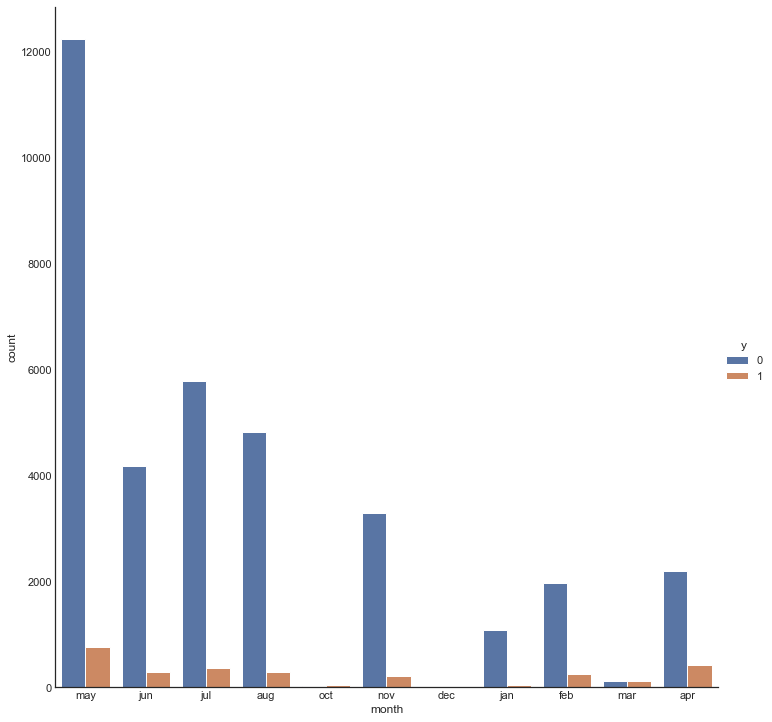

In [279]:
sns.catplot(x="month", hue='y', data=df, kind="count",height=10);

## Seasonality
<a id="4.2"></a>
Potential clients opted to suscribe term deposits during the seasons of **winter** and **spring**. The next marketing campaign should focus its activity throghout these seasons.

In [315]:
df2['y'] = df2['y'].apply(lambda x: 1 if x=='yes' else 0)

df2.loc[df["month"] == 'dec', 'season'] = 'winter'
df2.loc[df["month"] == 'jan', 'season'] = 'winter'
df2.loc[df["month"] == 'feb', 'season'] = 'winter'

df2.loc[df["month"] == 'mar', 'season'] = 'spring'
df2.loc[df["month"] == 'apr', 'season'] = 'spring'
df2.loc[df["month"] == 'may', 'season'] = 'spring'

df2.loc[df["month"] == 'jun', 'season'] = 'summer'
df2.loc[df["month"] == 'jul', 'season'] = 'summer'
df2.loc[df["month"] == 'aug', 'season'] = 'summer'

df2.loc[df["month"] == 'sep', 'season'] = 'fall'
df2.loc[df["month"] == 'oct', 'season'] = 'fall'
df2.loc[df["month"] == 'nov', 'season'] = 'fall'

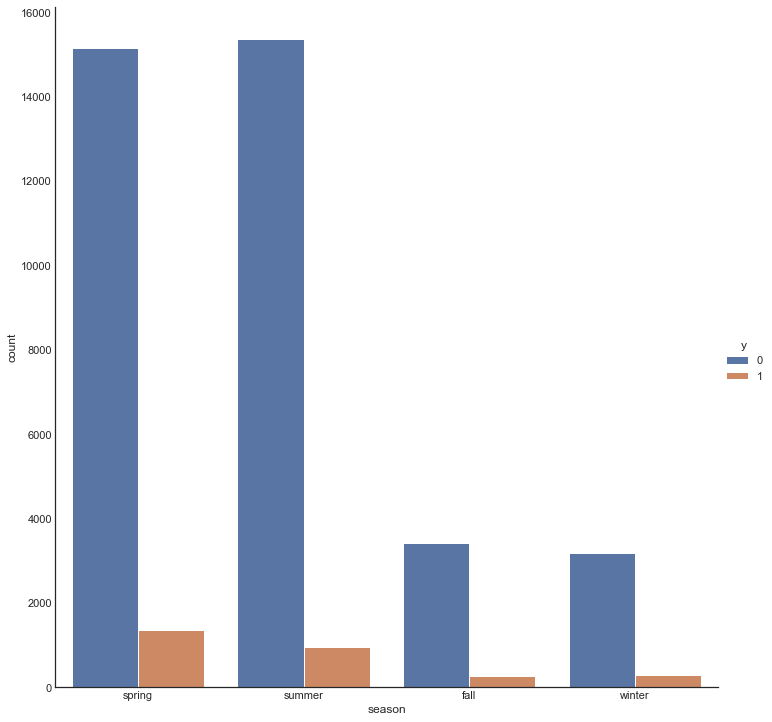

In [320]:
sns.catplot(x="season", hue='y', data=df2, kind="count",height=10);

In [319]:
season = df2.groupby('season')[['y']].sum().reset_index().rename(columns={'y':'y_yes'})
season['total_call'] = df2.groupby('season')[['y']].count().values
season['rate'] = season['y_yes']/season['total_call']
season.sort_values('rate',inplace=True,ascending=False)
season

season  y_yes  total_call      rate
3  winter    294        3485  0.084362
1  spring   1367       16508  0.082808
0    fall    269        3678  0.073138
2  summer    966       16329  0.059159

## Campaign Calls
<a id="4.3"></a>
A policy should be implemented that states that no more than 4 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit.

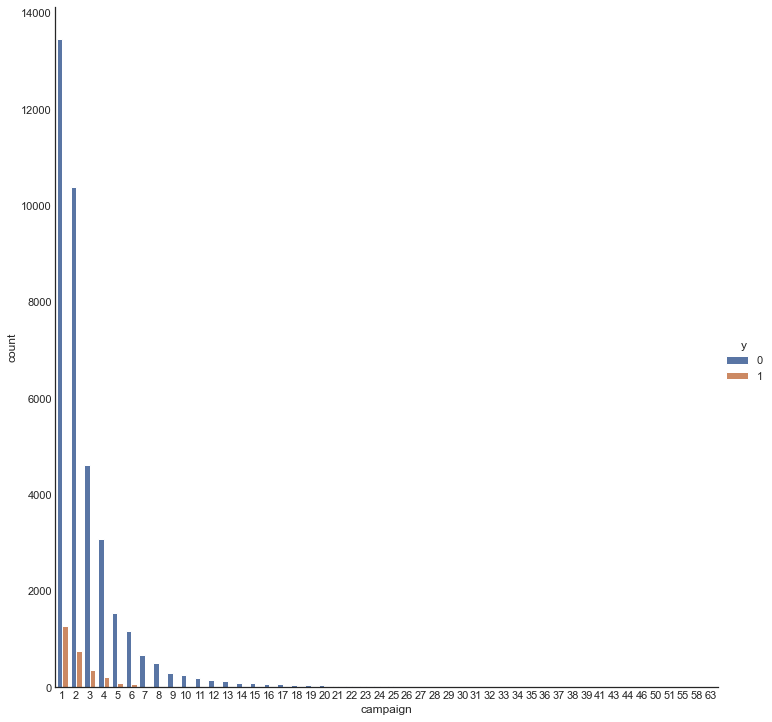

In [321]:
sns.catplot(x="campaign", hue='y', data=df2, kind="count",height=10);

In [322]:
campaign = df2.groupby('campaign')[['y']].sum().reset_index().rename(columns={'y':'y_yes'})
campaign['total_call'] = df2.groupby('campaign')[['y']].count().values
campaign['rate'] = campaign['y_yes']/campaign['total_call']
campaign.sort_values('rate',inplace=True,ascending=False)
campaign

campaign  y_yes  total_call      rate
31        32      1           9  0.111111
16        17      6          69  0.086957
0          1   1264       14718  0.085881
2          3    352        4970  0.070825
1          2    760       11153  0.068143
3          4    222        3297  0.067334
10        11     13         197  0.065990
28        29      1          16  0.062500
8          9     19         318  0.059748
4          5     95        1642  0.057856
5          6     68        1228  0.055375
6          7     35         699  0.050072
23        24      1          20  0.050000
14        15      4          83  0.048193
7          8     25         526  0.047529
9         10     12         262  0.045802
12        13      6         131  0.045802
13        14      4          93  0.043011
20        21      1          35  0.028571
11        12      4         154  0.025974
15        16      2          78  0.025641
19        20      1          43  0.023256
38        39      0           1  0.000000
39        41      0           2  0.000000
40        43      0           3  0.000000
37        38      0           3  0.000000
46        58      0           1  0.000000
41        44      0           1  0.000000
42        46      0           1  0.000000
43        50      0           2  0.000000
44        51      0           1  0.000000
45        55      0           1  0.000000
35        36      0           4  0.000000
36        37      0           2  0.000000
24        25      0          22  0.000000
34        35      0           4  0.000000
33        34      0           5  0.000000
32        33      0           6  0.000000
30        31      0          12  0.000000
29        30      0           8  0.000000
27        28      0          16  0.000000
26        27      0          10  0.000000
25        26      0          13  0.000000
22        23      0          22  0.000000
21        22      0          23  0.000000
18        19      0          44  0.000000
17        18      0          51  0.000000
47        63      0           1  0.000000

## Age Category
<a id="4.4"></a>
The bank's next marketing campaign should target potential customers between the ages of **20 and 35**. The chance of this category to be exposed to time deposits is **8.5%**. It would be great for the next campaign for the bank to address this categorie and therefore increase the likelihood of more time deposits suspicion.

In [345]:
def age_class(df):
        
    df.loc[df['age'] <= 20, 'AGE_CLASS'] = 'under20'
    
    df.loc[(df['age'] > 20) & (df['age'] <= 35), 'AGE_CLASS'] = '20-35'
    
    df.loc[(df['age'] > 35) & (df['age'] <= 50), 'AGE_CLASS'] = '35-50'
        
    df.loc[(df['age'] > 50) & (df['age'] <= 60), 'AGE_CLASS'] = '50-60'
   
    df.loc[df['age'] > 60, 'AGE_CLASS'] = '60+'

age_class(df2)

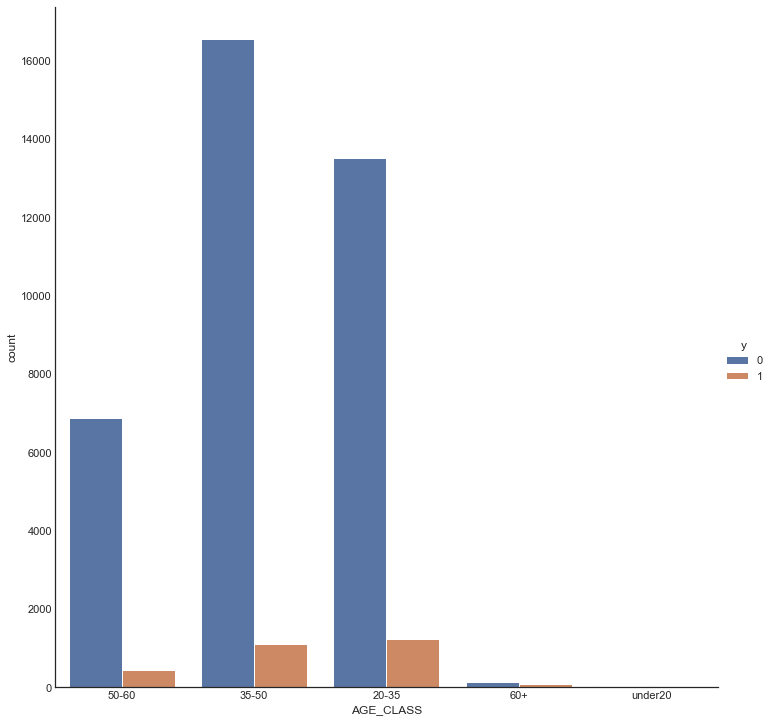

In [346]:
sns.catplot(x="AGE_CLASS", hue='y', data=df2, kind="count",height=10);

In [348]:
age = df2.groupby('AGE_CLASS')[['y']].sum().reset_index().rename(columns={'y':'y_yes'})
age['total_call'] = df2.groupby('AGE_CLASS')[['y']].count().values
age['rate'] = campaign['y_yes']/campaign['total_call']
age.sort_values('rate',inplace=True,ascending=False)
age

AGE_CLASS  y_yes  total_call      rate
0     20-35   1245       14761  0.085881
2     50-60    443        7318  0.070825
1     35-50   1111       17653  0.068143
3       60+     91         234  0.067334
4   under20      6          34  0.057856

## Occupation
<a id="4.5"></a>
Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.

In [350]:
job = df2.groupby('job')[['y']].sum().reset_index().rename(columns={'y':'y_yes'})
job['total_call'] = df2.groupby('job')[['y']].count().values
job['rate'] = job['y_yes']/job['total_call']
job.sort_values('rate',inplace=True,ascending=False)
job

job  y_yes  total_call      rate
8         student     82         524  0.156489
5         retired    151        1437  0.105080
10     unemployed     96        1104  0.086957
4      management    676        8166  0.082782
6   self-employed    112        1414  0.079208
0           admin    351        4483  0.078296
9      technician    497        6852  0.072534
11        unknown     17         235  0.072340
2    entrepreneur     88        1405  0.062633
7        services    238        3910  0.060870
1     blue-collar    535        9383  0.057018
3       housemaid     53        1087  0.048758

## House Loans and Balances
<a id="4.6"></a>
Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit.

In [352]:
loan = df2.groupby('loan')[['y']].sum().reset_index().rename(columns={'y':'y_yes'})
loan['total_call'] = df2.groupby('loan')[['y']].count().values
loan['rate'] = loan['y_yes']/loan['total_call']
loan.sort_values('rate',inplace=True,ascending=False)
loan

loan  y_yes  total_call      rate
0   no   2516       33070  0.076081
1  yes    380        6930  0.054834

## Target individuals with a higher duration (above 254)
<a id="4.7"></a>
Target the target group that is above average in duration, there is a highly likelihood that this target group would open a term deposit account. The likelihood that this group would open a term deposit account is at 46% which is pretty high. This would allow that the success rate of the next marketing campaign would be highly successful.

In [357]:
df2.corr()

age   balance       day  duration  campaign         y
age       1.000000  0.081517 -0.011689 -0.036270  0.016204 -0.020273
balance   0.081517  1.000000  0.011662  0.014072 -0.008137  0.030232
day      -0.011689  0.011662  1.000000 -0.032983  0.165429 -0.006420
duration -0.036270  0.014072 -0.032983  1.000000 -0.088387  0.461169
campaign  0.016204 -0.008137  0.165429 -0.088387  1.000000 -0.040350
y        -0.020273  0.030232 -0.006420  0.461169 -0.040350  1.000000

In [358]:
df['duration'].mean()

254.8243

***
#### By combining all these strategies and simplifying the market audience the next campaign should address, it is likely that the next marketing campaign of the bank will be more effective than the current one.
